# Capstone Project
The present notebook documents the start-to-finish Data Science Process—from preprocessing and exploration to modeling and interpreting—as it pertains to this **Capstone Project**, done in culmination of the Part-Time Online Data Science Course with Flatiron School.


* Student name: Tim Sennett
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: Friday, July 24, 10:30 AM EDT
* Instructor name: Jeff Herman
* Blog post URL: https://medium.com/@timsennett/

## Proposal

As injury prevention and rehabilitation remains an area for progress in athletics programs and professional sports organizations, there are reports that Major League Baseball (MLB) teams have, in recent years, begun to integrate their training and strength/conditioning operations with their baseball analytics departments, with the hope that they might, among other things, more reliably predict (and therefore avoid) player injuries.

In his 2017 book, *Smart Baseball*, Keith Law (then of ESPN) cites a team General Manager who said, "Having all of this data allows you to track player wellness better and hopefully cuts some potential injuries off at the pass. Even guys' running speed, when they're getting treatment for leg stuff, you see their speed drop down you know to give guys an off day. It might be some of the most low-hanging fruit out there, minimizing [Injured List] days, optimizing health and wellness."

Consider, for example, that roughly a quarter of major league pitchers used in 2017 had at some point in their lives undergone ulnar collateral ligament reconstruction (the procedure known as [Tommy John surgery](https://tht.fangraphs.com/ten-interesting-facts-about-tommy-john-surgery/#:~:text=In%20all%2C%2026%20percent%20of,had%20undergone%20Tommy%20John%20surgery.&text=In%202017%2C%20a%20whopping%2086.7,has%20had%20Tommy%20John%20surgery.)), from which it takes an average of 12–15 months to recover. Is it possible that, rather than living with an increased risk of seeing their most [valuable investments](https://www.cnbc.com/2019/12/11/gerrit-cole-agrees-to-historic-324-million-deal-with-yankees-reports.html#:~:text=Gerrit%20Cole%20agrees%20to%20historic%20%24324%20million%20deal%20with%20Yankees%2C%20reports%20say,-Published%20Wed%2C%20Dec&text=Gerrit%20Cole%2C%20the%20top%20free,largest%20deal%20in%20MLB%20history.) go under the knife, teams may be able to analyze certain newly-available, underlying pitch metrics (e.g., declining spin rates), as a proxy for fatigue? If it is shown that statistical trends related to pitch data—much of which is imperceptible to the eye—can help forecast injuries, teams may be empowered to offer proactive treatment and rest to pitchers before they begin to feel explicit pain or suffer structural damage.

Of course, each pitcher's body is unique and will respond to stress differently. There is probably no "one-size-fits-all" solution to this problem, and therefore a significant sample of starting pitchers ought be studied. As for the scope of this current analysis, any conclusions found here should be limited to my particular case study—namely, seven-time All-Star Chris Sale of the Boston Red Sox—and may not necessarily apply to other pitchers.

In his eight seasons as a starting pitcher in the major leagues—first with the Chicago White Sox, and then with Boston—Sale has acquired something of a reputation for showing diminished results near seasons' end. In fact, in his career, Sale has been 38% worse in September/October than in March/April–August. (See tOPS+ by month in the chart below, where 100 represents average monthly performance.)

<table class="" id="" data-cols-to-freeze="2" tabindex="-1" cellpadding="3" cellspacing="0" border="0" style="width:100%;max-width:300px;">
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>
      <tr>
         <th scope="col" align="center">I</th>
         <th scope="col" align="left">Split</th>
         <th scope="col" align="center">G</th>
         <th scope="col" align="center">PA</th>
         <th scope="col" align="center">AB</th>
         <th scope="col" align="center">R</th>
         <th scope="col" align="center">H</th>
         <th scope="col" align="center">2B</th>
         <th scope="col" align="center">3B</th>
         <th scope="col" align="center">HR</th>
         <th scope="col" align="center">BB</th>
         <th scope="col" align="center">SO</th>
         <th scope="col" data-filter="1" data-name="Strikeouts / Base On Balls" align="center">SO/W</th>
         <th scope="col" data-filter="1" data-name="Batting Average" align="center">BA</th>
         <th scope="col" data-filter="1" data-name="On-Base%" align="center">OBP</th>
         <th scope="col" data-filter="1" data-name="Slugging %" align="center">SLG</th>
         <th scope="col" data-filter="1" data-name="On-Base Plus Slugging" align="center">OPS</th>
         <th scope="col" align="center">TB</th>
         <th scope="col" data-filter="1" data-name="Batting Average on Balls In Play" align="center">BAbip</th>
         <th scope="col" align="center">tOPS+</th>
      </tr>
   </thead>
   <tbody>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CApril%2FMarch%7Csalech01%7Cpitch%7CAB%7C" align="left">April/March</td><td align="right">49</td><td align="right">1036</td><td align="right">955</td><td align="right">99</td><td align="right">207</td><td align="right">44</td><td align="right">3</td><td align="right">27</td><td align="right">62</td><td align="right">278</td><td align="right">4.48</td><td align="right">.217</td><td align="right">.271</td><td align="right">.354</td><td align="right">.625</td><td align="right">338</td><td align="right">.275</td><td align="right">100</td></tr>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CMay%7Csalech01%7Cpitch%7CAB%7C" align="left">May</td><td align="right">51</td><td align="right">1096</td><td align="right">999</td><td align="right">91</td><td align="right">183</td><td align="right">40</td><td align="right">4</td><td align="right">24</td><td align="right">73</td><td align="right">364</td><td align="right">4.99</td><td align="right">.183</td><td align="right">.247</td><td align="right">.303</td><td align="right">.551</td><td align="right">303</td><td align="right">.257</td><td align="right">77</td></tr>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CJune%7Csalech01%7Cpitch%7CAB%7C" align="left">June</td><td align="right">55</td><td align="right">1270</td><td align="right">1177</td><td align="right">98</td><td align="right">245</td><td align="right">43</td><td align="right">2</td><td align="right">25</td><td align="right">63</td><td align="right">401</td><td align="right">6.37</td><td align="right">.208</td><td align="right">.256</td><td align="right">.312</td><td align="right">.568</td><td align="right">367</td><td align="right">.290</td><td align="right">83</td></tr>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CJuly%7Csalech01%7Cpitch%7CAB%7C" align="left">July</td><td align="right">44</td><td align="right">1024</td><td align="right">945</td><td align="right">82</td><td align="right">216</td><td align="right">47</td><td align="right">1</td><td align="right">23</td><td align="right">53</td><td align="right">309</td><td align="right">5.83</td><td align="right">.229</td><td align="right">.284</td><td align="right">.353</td><td align="right">.637</td><td align="right">334</td><td align="right">.314</td><td align="right">105</td></tr>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CAugust%7Csalech01%7Cpitch%7CAB%7C" align="left">August</td><td align="right">56</td><td align="right">1121</td><td align="right">1032</td><td align="right">111</td><td align="right">225</td><td align="right">44</td><td align="right">3</td><td align="right">34</td><td align="right">66</td><td align="right">367</td><td align="right">5.56</td><td align="right">.218</td><td align="right">.275</td><td align="right">.365</td><td align="right">.640</td><td align="right">377</td><td align="right">.302</td><td align="right">105</td></tr>
<tr><th scope="row" align="left"></th><td data-endpoint="/tools/split_stats.cgi?full=0&amp;params=month%7CSept%2FOct%7Csalech01%7Cpitch%7CAB%7C" align="left">Sept/Oct</td><td align="right">57</td><td align="right">997</td><td align="right">916</td><td align="right">109</td><td align="right">236</td><td align="right">36</td><td align="right">4</td><td align="right">39</td><td align="right">57</td><td align="right">288</td><td align="right">5.05</td><td align="right">.258</td><td align="right">.313</td><td align="right">.433</td><td align="right">.747</td><td align="right">397</td><td align="right">.332</td><td align="right">138</td></tr>
</tbody></table>
</tbody></table><div id="credit_month" class="sr_share" style="font-size: 0.83em;">Provided by <a href="https://www.sports-reference.com/sharing.html?utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool">Baseball-Reference.com</a>: <a href="https://www.baseball-reference.com/players/split.fcgi?id=salech01&amp;t=p&amp;year=Career&amp;utm_source=direct&amp;utm_medium=Share&amp;utm_campaign=ShareTool#month">View Original Table</a><br>Generated 7/3/2020.</div>
</div>

In addition to these late-season slides, Sale has been somewhat injury-prone, especially in the second half of his career. Since 2015, he's been placed on the Injured List (IL) on five occasions, resulting in 121 missed games, and has made [$10,207,891](https://www.spotrac.com/mlb/boston-red-sox/chris-sale-7278/injuries/) during his time spent on the IL alone. (Those numbers are set to climb this year, as Sale will miss the entire, albeit [shortened](https://www.npr.org/2020/06/24/882678448/major-league-baseball-comes-back-for-shorter-season-after-coronavirus-shutdown#:~:text=Live%20Sessions-,Major%20League%20Baseball%20Comes%20Back%20For%20Shorter%20Season%20After%20Coronavirus,training%20beginning%20on%20July%201.), 2020 season while he recovers from—you guessed it—Tommy John surgery.)

In 2015, MLB introduced [Statcast](https://www.mlb.com/news/statcast-primer-baseball-will-never-be-the-same/c-119234412), a tracking technology that gathers previously immeasurable information about virtually every type of event that transpires in a baseball game. It collects the data "using a series of high-resolution optical cameras along with radar equipment that has been installed in all 30 Major League ballparks. The technology precisely tracks the location and movements of the ball and every player on the field at any given time." As it relates to pitching, Statcast opens up a whole new ecosystem of information to be analyzed, offering metrics such as vertical release point, horizontal release point, release extension, velocity and acceleration (in three dimensions), release spin rate, and more.

With this relatively new information, it's plausible to think that, rather than waiting for a pitcher to get knocked around before warming up a reliever, such decisions can be made several pitches earlier if and when a dip in spin rate becomes apparent in the data. Or, rather than pushing a pitcher to the point of injury, that loss can be projected and avoided, or at least mitigated, after trends in the data emerge that might provide some advanced notice.

For decades, pitcher fatigue (not to mention the injuries that can follow) was most likely to be detected by the on-field results of pitches. *Is the pitcher getting hit hard? Are his stats suffering? Is he wincing after each pitch, or grabbing his hamstring?* **My aim is to see if, at least in Chis Sale's case, fatigue and/or injury can be targeted in a manner independent from on-field results by tracking the granular data, offered by Statcast, associated with the movement of each pitch.**

### Following the [OSEMN framework](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492), the present notebook is organized according to the following basic steps:

1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret

## 1. Obtain
#### Gathering data from the relevant sources.

The data for this project was obtained from by utilizing the Search page at [Baseball Savant](https://baseballsavant.mlb.com/statcast_search). I queried for every pitch that Chris Sale threw from 2015–2019, using the terms seen here:


<img src="img/savant_search_terms.png" alt="Baseball Savant Search Terms"/>

After selecting the appropriate search terms and clicking "Search", an option appears allowing the user to download the data as a CSV file. That file has been included in the present repository as `savant_data_sale.csv`.

Though not strictly necessary for this project, anyone interested in making more complex searches may gain from watching this series of [video tutorials](https://www.youtube.com/watch?v=5YfzU11cd4c) about the Baseball Savant search function. 

A full list of features and their respective descriptions have been placed in the `columns.txt` file of this repository.

In [466]:
# Import libraries that I anticipate using

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from yellowbrick.classifier import ConfusionMatrix

from IPython.display import HTML
from IPython.display import Javascript
from IPython.display import YouTubeVideo

# from custom_functions import *

import warnings
warnings.filterwarnings('ignore')

In [215]:
# STOP when project is done, move these to the python script

def pitch_counter(df):
    '''Creates and populates a `pitch_per_game` column in DataFrame, giving
    each row an updated pitch-count for each pitch thrown per game.

    Args:
        df (DataFrame): DataFrame on which to create and populate
        `pitch_per_game` column.

    Returns:
        DataFrame.head(): Preview of first five rows of updated DataFrame.
    '''
    # create pitch-per-game column
    df['Pitch_Per_Game'] = 0
    # start counter at 1
    i = 1
    for index in range(len(df)):
        try:
            # when next pitch is thrown on same date as the current pitch
            if df['Game_Date'][index] == df['Game_Date'][index + 1]:
                # increase pitch_per_game of current pitch by i
                df['Pitch_Per_Game'][index] += i
                # add 1 to i
                i += 1
            # when next pitch is thrown on different date as the current pitch
            else:
                # increase pitch_per_game of current pitch by i
                df['Pitch_Per_Game'][index] += i
                # reset i
                i = 1
        # necessary for last row, when there is no "next pitch"
        except KeyError:
            # increase pitch_per_game of current pitch by i
            df['Pitch_Per_Game'][index] += i
    return df.head()


def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    '''Trains K-Nearest Neighbors classifier on passed training and
    testing subsets, for every odd k value between min_k and max_k.
    Returns evaluation metrics resulting from classifier with
    optimal k value, and a confusion matrix.

    Args:
        X_train (ndarray): Train subset X (data)
        y_train (Series): Train subset y (predictions)
        X_test (ndarray): Test subset X (data)
        y_test (Series): Test subset y (predictions)
        min_k (int): Minimum value for best K
        max_k (int): Maximum value for best K

    Returns:
        string: "Best Value for k: {}"
        string: "Accuracy: {}"
        string: "Precision: {}"
        string: "Recall: {}"
        string: "F1-Score: {}"
        plot: Confusion Matrix

    '''
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        # Instantiate KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=k)
        # Fit the classifier
        knn.fit(X_train, y_train)
        # Predict on the test set
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        precision = precision_score(y_test, preds, average='macro')
        recall = recall_score(y_test, preds, average='macro')
        f1 = f1_score(y_test, preds, average='macro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    cm = ConfusionMatrix(knn, classes=y_train.unique())
    cm.score(X_test, y_test)
    print("Best Value for k: {}".format(best_k))
    print("Accuracy: {}".format(round(accuracy,3)))
    print("Precision: {}".format(round(precision, 3)))
    print("Recall: {}".format(round(recall, 3)))
    print("F1-Score: {}".format(round(best_score, 3)))
    plt.tight_layout()
    cm.show()
    

def boxplot(data):
    metrics = ['Release_Speed', 'Release_Point_X', 'Release_Point_Y',
               'Release_Point_Z', 'Horizontal_Movement', 'Vertical_Movement',
               'Velocity_X', 'Velocity_Y', 'Velocity_Z', 'Acceleration_X',
               'Acceleration_Y', 'Acceleration_Z', 'Perceived_Speed',
               'Release_Spin_Rate', 'Release_Extension']
    sns.set(style="darkgrid", context='notebook')
    for metric in metrics:
        plt.figure(figsize=(8,5))
        sns.boxplot(x='Pitch_Name', y=metric, data=data)
        plt.title('Distribution of "{}" by Pitch Type'.format(metric.replace('_', ' ')))
        plt.xlabel('Pitch Type')
        plt.ylabel(metric.replace('_', ' '))
        plt.tight_layout()

In the next cell, I'll check to see what's in the current repository. I want to be sure to load the appropriate data.

In [11]:
ls

README.md                           extra code.ipynb
Untitled.ipynb                      future_work.txt
__pycache__/                        img/
columns.txt                         online_capstone_project_rubric.pdf
custom_functions.py                 student.ipynb
data/


In [12]:
ls data/

savant_data_sale.csv


I'm going to begin with the `savant_data_sale.csv` file, so I'll now import that as a Pandas DataFrame. This dataset includes every regular-season pitch that Sale threw in the major leagues from 2015 (the first year of the "Statcast era") through 2019.

In [13]:
sale = pd.read_csv('data/savant_data_sale.csv')

In [14]:
# Check to see that my data imported properly
sale.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,CH,2019-08-13,89.8,3.1853,4.9191,Chris Sale,596019,519242,double,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Francisco Lindor doubles (28) on a line drive ...,R,R,L,CLE,BOS,X,7.0,line_drive,0,1,2019,1.4110,-0.0924,-0.0889,1.4573,547379.0,656185.0,NaN,2,7,Bot,55.97,110.57,NaN,NaN,506702.0,NaN,190814_014412,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,3.2900,1.5500,118.0,107.8,5.0,89.118,1983.0,5.973,565379,519242,506702.0,519048.0,593523.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.5262,0.642,0.585,1.25,1.0,1.0,1.0,4.0,64,2,Changeup,3,6,3,6,6,3,3,6,Standard,Standard
1,SL,2019-08-13,81.3,3.2220,5.2825,Chris Sale,596019,519242,NaN,called_strike,NaN,NaN,NaN,NaN,12.0,NaN,R,R,L,CLE,BOS,S,NaN,NaN,0,0,2019,-1.0911,-0.3883,0.8851,3.0959,547379.0,656185.0,NaN,2,7,Bot,NaN,NaN,NaN,NaN,506702.0,NaN,190814_014344,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,3.4565,1.5855,NaN,NaN,NaN,79.805,2624.0,5.435,565379,519242,506702.0,519048.0,593523.0,646240.0,593428.0,643217.0,598265.0,605141.0,55.0647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,1,Slider,3,6,3,6,6,3,3,6,Standard,Standard
2,SL,2019-08-13,83.1,3.0410,5.2492,Chris Sale,571980,519242,field_out,hit_into_play,NaN,NaN,NaN,NaN,5.0,Tyler Naquin pops out to first baseman Mitch M...,R,L,L,CLE,BOS,X,3.0,popup,2,2,2019,-1.1546,-0.4757,-0.1503,2.2940,547379.0,656185.0,NaN,1,7,Bot,167.72,156.28,NaN,NaN,506702.0,NaN,190814_014256,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,3.4100,1.6200,146.0,72.5,62.5,82.835,2636.0,6.117,565379,519242,506702.0,519048.0,593523.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.3824,0.015,0.017,0.00,1.0,0.0,0.0,3.0,63,5,Slider,3,6,3,6,6,3,3,6,Standard,Standard
3,FF,2019-08-13,96.6,3.0312,5.5203,Chris Sale,571980,519242,NaN,swinging_strike,NaN,NaN,NaN,NaN,2.0,NaN,R,L,L,CLE,BOS,S,NaN,NaN,2,1,2019,0.9229,0.9892,-0.0025,3.1884,547379.0,656185.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,506702.0,NaN,190814_014222,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,3.4100,1.6200,NaN,NaN,NaN,96.925,2422.0,6.540,565379,519242,506702.0,519048.0,593523.0,646240.0,593428.0,643217.0,598265.0,605141.0,53.9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,4,4-Seam Fastball,3,6,3,6,6,3,3,6,Standard,Standard
4,FF,2019-08-13,95.7,3.1314,5.2087,Chris Sale,571980,519242,NaN,called_strike,NaN,NaN,NaN,NaN,1.0,NaN,R,L,L,CLE,BOS,S,NaN,NaN,2,0,2019,1.1255,0.9681,-0.5661,2.9124,547379.0,656185.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,506702.0,NaN,190814_014153,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,3.3321,1.5286,NaN,NaN,NaN,95.798,2525.0,6.554,565379,519242,506702.0,519048.0,593523.0,646240.0,593428.0,643217.0,598265.0,605141.0,53.9453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,3,4-Seam Fastball,3,6,3,6,6,3,3,6,Standard,Standard


## 2. Scrub / Preprocessing
#### Clean data to a format suitable for machine learning and time-series analysis.

In the next few cells, I'll look to understand the dimensionality of my DataFrame, and get a feel for what sort of data it contains. I'll also be on the lookout for missing data, as well as any features that may not be useful.

In [15]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15173 entries, 0 to 15172
Data columns (total 89 columns):
pitch_type                         15094 non-null object
game_date                          15173 non-null object
release_speed                      15163 non-null float64
release_pos_x                      15036 non-null float64
release_pos_z                      15036 non-null float64
player_name                        15173 non-null object
batter                             15173 non-null int64
pitcher                            15173 non-null int64
events                             3854 non-null object
description                        15173 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               15163 non-null float64
des                                3854 non-nul

The DataFrame includes 89 total features and 15,172 observations. A detailed understanding of these columns can be gleaned from the [Statcast Search CSV Documentation](https://baseballsavant.mlb.com/csv-docs), which includes a description for each feature.

Right away, I know that several of these features are going to be of no help in answering my question, because they're irrelevant for some reason or another. In many cases, these features contain information about the on-field result of a given pitch rather than the underlying pitch information that I'm interested in using. It's best that I remove the potential influence of matters outside of the pitcher's control, such as defense, the skill of the batter, the (largely subjective) calls made by umpires, or random chance. I'll go ahead and remove those, keeping only the features that potentially have some value in targeting pitcher fatigue in a manner independent from on-field results:

- `player_name`
- `batter`
- `pitcher`
- `events`
- `description`
- `spin_dir`
- `spin_rate_deprecated`
- `break_angle_deprecated`
- `break_length_deprecated`
- `des`
- `game_type`
- `stand`
- `p_throws`
- `home_team`
- `away_team`
- `type`
- `hit_location`
- `balls`
- `strikes`
- `game_year`
- `on_3b`
- `on_2b`
- `on_1b`
- `outs_when_up`
- `inning_topbot`
- `tfs_deprecated`
- `tfs_zulu_deprecated`
- `fielder_2`
- `umpire`
- `sv_id`
- `sz_top`
- `sz_bot`
- `game_pk`
- `pitcher.1`
- `fielder_2.1`
- `fielder_3`
- `fielder_4`
- `fielder_5`
- `fielder_6`
- `fielder_7`
- `fielder_8`
- `fielder_9`
- `woba_value`
- `woba_denom`
- `babip_value`
- `iso_value`
- `home_score`
- `away_score`
- `bat_score`
- `fld_score`
- `post_home_score`
- `post_away_score`
- `post_bat_score`
- `post_fld_score`
- `if_fielding_alignment`
- `of_fielding_alignment`

In [16]:
sale.drop(columns=['player_name', 'batter', 'pitcher', 'events', 'spin_dir',
                   'spin_rate_deprecated', 'break_angle_deprecated',
                   'break_length_deprecated', 'des', 'game_type', 'p_throws',
                   'home_team', 'away_team', 'hit_location', 'balls',
                   'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up',
                   'inning_topbot', 'tfs_deprecated', 'tfs_zulu_deprecated',
                   'fielder_2', 'umpire', 'sv_id', 'sz_top', 'sz_bot',
                   'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3',
                   'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
                   'fielder_8', 'fielder_9', 'woba_value', 'woba_denom',
                   'babip_value', 'iso_value', 'home_score', 'away_score',
                   'bat_score', 'fld_score', 'post_home_score',
                   'post_away_score', 'post_bat_score', 'post_fld_score',
                   'if_fielding_alignment', 'of_fielding_alignment',
                   'stand', 'type', 'game_year', 'description'],
          inplace=True)

In [17]:
# preview updated data

sale.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,zone,bb_type,pfx_x,pfx_z,plate_x,plate_z,inning,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,launch_speed_angle,at_bat_number,pitch_number,pitch_name
0,CH,2019-08-13,89.8,3.1853,4.9191,8.0,line_drive,1.4110,-0.0924,-0.0889,1.4573,7,55.97,110.57,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,118.0,107.8,5.0,89.118,1983.0,5.973,54.5262,0.642,0.585,4.0,64,2,Changeup
1,SL,2019-08-13,81.3,3.2220,5.2825,12.0,NaN,-1.0911,-0.3883,0.8851,3.0959,7,NaN,NaN,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,NaN,NaN,NaN,79.805,2624.0,5.435,55.0647,NaN,NaN,NaN,64,1,Slider
2,SL,2019-08-13,83.1,3.0410,5.2492,5.0,popup,-1.1546,-0.4757,-0.1503,2.2940,7,167.72,156.28,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,146.0,72.5,62.5,82.835,2636.0,6.117,54.3824,0.015,0.017,3.0,63,5,Slider
3,FF,2019-08-13,96.6,3.0312,5.5203,2.0,NaN,0.9229,0.9892,-0.0025,3.1884,7,NaN,NaN,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,NaN,NaN,NaN,96.925,2422.0,6.540,53.9592,NaN,NaN,NaN,63,4,4-Seam Fastball
4,FF,2019-08-13,95.7,3.1314,5.2087,1.0,NaN,1.1255,0.9681,-0.5661,2.9124,7,NaN,NaN,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,NaN,NaN,NaN,95.798,2525.0,6.554,53.9453,NaN,NaN,NaN,63,3,4-Seam Fastball


In [18]:
# see column and null value counts

print("There are {} columns remaining.".format(len(sale.columns)))
sale.isnull().sum()

There are 33 columns remaining.


pitch_type                            79
game_date                              0
release_speed                         10
release_pos_x                        137
release_pos_z                        137
zone                                  10
bb_type                            12868
pfx_x                                 10
pfx_z                                 10
plate_x                               10
plate_z                               10
inning                                 0
hc_x                               12868
hc_y                               12868
vx0                                   10
vy0                                   10
vz0                                   10
ax                                    10
ay                                    10
az                                    10
hit_distance_sc                    11687
launch_speed                       11432
launch_angle                       11432
effective_speed                      172
release_spin_rat

That leaves me with 33 columns.

Let me now take some further inventory of these remaining features, and see there's anything else worth removing.

It appears there are several columns where null values abound. Particularly, I'm referring to...

- `bb_type`
- `hc_x`
- `hc_y`
- `hit_distance_sc`
- `launch_speed`
- `launch_angle`
- `estimated_ba_using_speedangle`
- `estimated_woba_using_speedangle`
- `launch_speed_angle`

Unsurprisingly, these are features that are dependent on the given observation, or pitch, being hit by the batter into the field of play. Since most pitches are not hit into play (Indeed, this can technically only occur with the final pitch of a Plate Appearance [`at_bat_number`]), and because the aim of this project is to target pitcher fatigue in a manner independent from on-field results, I'm going to want to remove these columns as well.

Upon even further inspection, I notice that there are a handful of other features that are mostly unrelated to pitcher fatigue, and that, in some cases, are likely to be heavily influenced by the individual batter to whom a  pitch is thrown. For example, `plate_x`, which offers the horizontal position of the ball when it crosses home plate (from the catcher's perspective), may have less to say about a pitcher's stamina/fatigue than it does about such things as a game-plan, pitch-sequencing, a scouting report, the handedness of the batter, etc. With that said, it may be wise to remove these columns as well:

- `zone`
- `plate_x`
- `plate_z`

In [19]:
sale.drop(columns=['bb_type', 'hc_x', 'hc_y', 'hit_distance_sc',
                   'launch_speed', 'launch_angle',
                   'estimated_ba_using_speedangle',
                   'estimated_woba_using_speedangle', 'launch_speed_angle',
                   'zone', 'plate_x', 'plate_z'],
          inplace=True)

I almost have it winnowed down to only the features I need, with one small exception...

Judging from their respective descriptions found in the [documentation](https://baseballsavant.mlb.com/csv-docs), the features `pitch_type` and `pitch_name` may offer completely redundant information. Let me look into it:

In [20]:
sale[['pitch_type', 'pitch_name']].head(10)

,pitch_type,pitch_name
0,CH,Changeup
1,SL,Slider
2,SL,Slider
3,FF,4-Seam Fastball
4,FF,4-Seam Fastball
5,SL,Slider
6,SL,Slider
7,CH,Changeup
8,SL,Slider
9,CH,Changeup


In [21]:
print("There are {} unique pitch types.".format(sale['pitch_type'].nunique()))
print("There are {} unique pitch names.".format(sale['pitch_name'].nunique()),
     '\n')
print('Unique pitch types:')
print(sale['pitch_type'].unique(),'\n')
print('Unique pitch names:')
print(sale['pitch_name'].unique())

There are 8 unique pitch types.
There are 8 unique pitch names. 

Unique pitch types:
['CH' 'SL' 'FF' 'FT' nan 'UN' 'IN' 'FA' 'FS'] 

Unique pitch names:
['Changeup' 'Slider' '4-Seam Fastball' '2-Seam Fastball' nan 'Unknown'
 'Intentional Ball' 'Fastball' 'Split Finger']


In [22]:
# Compare value-counts in 'pitch_type' and 'pitch_name' columns

print(sale.pitch_type.value_counts(),'\n')
print(sale.pitch_name.value_counts())

FT    4475
SL    4445
FF    3135
CH    3033
FA       2
UN       2
IN       1
FS       1
Name: pitch_type, dtype: int64 

2-Seam Fastball     4475
Slider              4445
4-Seam Fastball     3135
Changeup            3033
Fastball               2
Unknown                2
Split Finger           1
Intentional Ball       1
Name: pitch_name, dtype: int64


Evidently, these columns contain virtually identical information, where `CH` in `pitch_type` corresponds to `Changeup` in `pitch_name`, and so on. (Also, there are obviously some classes here that only show up once our twice, which will be dealt with shortly.)

I'll remove `pitch_type`, because I prefer the unabbreviated values in `pitch_name`.

In [23]:
sale.drop(columns=['pitch_type'], inplace=True)

Anyone who knows Chris Sale also knows that he heavily utilizes a sinker, which is a type of fastball that [shares a very similar profile](https://www.drivelinebaseball.com/2020/06/how-to-throw-a-sinker-or-two-seam-fastball/) as the two-seam-fastball. My personal preference would be to rename those all of those two-seamers to "Sinker".

In [24]:
sale.replace(to_replace='2-Seam Fastball', value='Sinker', inplace=True)

In [25]:
# sanity check
sale.pitch_name.value_counts()

Sinker              4475
Slider              4445
4-Seam Fastball     3135
Changeup            3033
Fastball               2
Unknown                2
Split Finger           1
Intentional Ball       1
Name: pitch_name, dtype: int64

In [26]:
# check column count
print("There are {} columns remaining.".format(len(sale.columns)))

There are 20 columns remaining.


The more at look at them, the more I don't like some of these column names. They can be quite unintuitive, especially for someone who may be unfamiliar with the data. I'm going to take a moment to reformat and rename them.

In [27]:
# make all column names titlecase
sale.columns = map(str.title, sale.columns)
sale.head()

,Game_Date,Release_Speed,Release_Pos_X,Release_Pos_Z,Pfx_X,Pfx_Z,Inning,Vx0,Vy0,Vz0,Ax,Ay,Az,Effective_Speed,Release_Spin_Rate,Release_Extension,Release_Pos_Y,At_Bat_Number,Pitch_Number,Pitch_Name
0,2019-08-13,89.8,3.1853,4.9191,1.4110,-0.0924,7,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,89.118,1983.0,5.973,54.5262,64,2,Changeup
1,2019-08-13,81.3,3.2220,5.2825,-1.0911,-0.3883,7,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,79.805,2624.0,5.435,55.0647,64,1,Slider
2,2019-08-13,83.1,3.0410,5.2492,-1.1546,-0.4757,7,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,82.835,2636.0,6.117,54.3824,63,5,Slider
3,2019-08-13,96.6,3.0312,5.5203,0.9229,0.9892,7,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,96.925,2422.0,6.540,53.9592,63,4,4-Seam Fastball
4,2019-08-13,95.7,3.1314,5.2087,1.1255,0.9681,7,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,95.798,2525.0,6.554,53.9453,63,3,4-Seam Fastball


In [28]:
# rename some of the columns
sale.rename(columns={'Pfx_X':'Horizontal_Movement',
                     'Pfx_Z':'Vertical_Movement',
                     'Vx0':'Velocity_X',
                     'Vy0':'Velocity_Y',
                     'Vz0':'Velocity_Z',
                     'Ax':'Acceleration_X',
                     'Ay':'Acceleration_Y',
                     'Az':'Acceleration_Z',
                     'Release_Pos_X':'Release_Point_X',
                     'Release_Pos_Y':'Release_Point_Y',
                     'Release_Pos_Z':'Release_Point_Z',
                     'Effective_Speed': 'Perceived_Speed',
                     'At_Bat_Number':'Plate_Appearance',
                     'Pitch_Number':'Pitch_Per_PA'}, inplace=True)

In [29]:
# sanity check
sale.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name
0,2019-08-13,89.8,3.1853,4.9191,1.4110,-0.0924,7,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,89.118,1983.0,5.973,54.5262,64,2,Changeup
1,2019-08-13,81.3,3.2220,5.2825,-1.0911,-0.3883,7,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,79.805,2624.0,5.435,55.0647,64,1,Slider
2,2019-08-13,83.1,3.0410,5.2492,-1.1546,-0.4757,7,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,82.835,2636.0,6.117,54.3824,63,5,Slider
3,2019-08-13,96.6,3.0312,5.5203,0.9229,0.9892,7,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,96.925,2422.0,6.540,53.9592,63,4,4-Seam Fastball
4,2019-08-13,95.7,3.1314,5.2087,1.1255,0.9681,7,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,95.798,2525.0,6.554,53.9453,63,3,4-Seam Fastball


At this point—now that I've removed the unneeded columns—I'm actually going to separate any observations that occurred in 2015–2016 from those that occurred in 2017–2019, and make two distinct DataFrames out of them. The Statcast data search page offers a necessary consideration, which provides the primary rationale for this decision:

***Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.***

In her 2017 piece for *Deadspin*, entitled ["Major League Baseball's Statcast Can Break Sabermetrics"](https://deadspin.com/major-league-baseballs-statcast-can-break-sabermetrics-1820987737), Emma Baccellieri elaborates on the complications arising from this transition:

*Up until 2017, MLBAM’s pitch-specific data came from Pitchf/x, the camera system installed in all major-league parks for that purpose nearly a decade ago. But beginning this season, they decided to switch over from Pitchf/x’s cameras to Statcast’s radar. (The radar was already being used to track the ball in play, but any specific information about the pitch itself—such as its velocity—had been coming from the camera system of Pitchf/x.) Pitchf/x and Statcast don’t correlate precisely, though. The former measures velocity from a set point 50 to 55 feet back from home plate, while the latter measures right out of the pitcher’s hand. This means that Statcast readings will nearly always be faster, and switching from Pitchf/x readings led to some significant changes in basic pitching data. To someone who didn’t know that this change had taken place (which was just about everyone who wasn’t directly affiliated with MLB), it looked like almost every pitcher in the league had experienced a velocity bump of as much as a few miles per hour.*

...

*That clarification is informative and necessary, but the situation can still be maddening for anyone attempting multi-year analysis, to say nothing of an average fan quickly checking to see if his favorite pitcher threw any harder this season than the one before. In a league where a [velocity] increase of even a single mile per hour can be meaningful, comparing measurements taken by different systems can feel essentially useless. This set-up makes existing research harder to build on, and it gives future research a smaller sample size from which to draw.*

It's with this caveat in mind that I'll set apart the 2015–2016 samples, which were picked up using Pitchf/x's camera system, from the 2017–2019 samples that are drawn exclusively from Statcast radar.

In [30]:
# convert 'game_date' to datetime
sale['Game_Date'] = pd.to_datetime(sale.Game_Date, format='%Y-%m-%d')

In [31]:
# sanity check
sale.Game_Date.dtype

dtype('<M8[ns]')

In [32]:
# make 2015–16 subset
sale_pitchfx = sale[sale['Game_Date'].isin(pd.date_range('2015-01-01',
                                                         '2016-12-31'))]

# make 2017–19 subset
sale_statcast = sale[sale['Game_Date'].isin(pd.date_range('2017-01-01',
                                                          '2019-12-31'))]

In [33]:
# display head of sale_pitchfx
sale_pitchfx.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name
8419,2016-10-02,76.3,3.6644,5.3191,-0.889850,-0.896500,5,-3.476,-111.018,2.814,-6.723,22.296,-41.520,74.675,2183.0,5.554,54.9479,40,7,Slider
8420,2016-10-02,94.0,3.5996,5.5991,1.194867,1.052833,5,-9.777,-136.487,-2.659,17.641,35.081,-21.086,92.533,2339.0,6.139,54.3626,40,6,Sinker
8421,2016-10-02,92.8,3.5680,5.5854,1.022300,1.178967,5,-10.636,-134.695,-3.873,14.980,33.372,-19.741,91.393,2331.0,6.090,54.4115,40,5,Sinker
8422,2016-10-02,94.4,3.5427,5.6577,1.197650,0.865067,5,-13.136,-136.727,-4.115,17.816,33.913,-23.433,92.920,2333.0,6.158,54.3433,40,4,Sinker
8423,2016-10-02,93.8,3.3911,5.8256,1.098842,0.720300,5,-10.283,-136.080,-4.796,16.161,36.573,-25.458,91.990,2315.0,6.158,54.3440,40,3,Sinker


In [34]:
# display head of sale_statcast
sale_statcast.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name
0,2019-08-13,89.8,3.1853,4.9191,1.4110,-0.0924,7,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,89.118,1983.0,5.973,54.5262,64,2,Changeup
1,2019-08-13,81.3,3.2220,5.2825,-1.0911,-0.3883,7,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,79.805,2624.0,5.435,55.0647,64,1,Slider
2,2019-08-13,83.1,3.0410,5.2492,-1.1546,-0.4757,7,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,82.835,2636.0,6.117,54.3824,63,5,Slider
3,2019-08-13,96.6,3.0312,5.5203,0.9229,0.9892,7,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,96.925,2422.0,6.540,53.9592,63,4,4-Seam Fastball
4,2019-08-13,95.7,3.1314,5.2087,1.1255,0.9681,7,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,95.798,2525.0,6.554,53.9453,63,3,4-Seam Fastball


Currently, the data in both subsets (`sale_pitchfx` and `sale_statcast`) is sorted in a descending manner, with the most recent `Game_Date` values appearing at the top. Plate-appearances-per-game (`Plate_Appearance`) and pitches-per-plate-appearance (`Pitch_Per_PA`) likewise are sorted as descending values. I'd like the flip that around, for a couple of reasons. For one, it'll make my data more straightforwardly chronological. Secondly, it'll allow me to engineer a new pitch-counter feature (I'll call it `Pitch_Per_Game`) that should come in handy as I move ahead in my analysis.

In [35]:
# sort values on game_date, plate_appearance, and pitch_number
sale_pitchfx.sort_values(['Game_Date', 'Plate_Appearance', 'Pitch_Per_PA'],
                         inplace=True)
sale_statcast.sort_values(['Game_Date', 'Plate_Appearance', 'Pitch_Per_PA'],
                          inplace=True)

# reset index
sale_pitchfx.reset_index(drop=True, inplace=True)
sale_statcast.reset_index(drop=True, inplace=True)

In [36]:
# sanity check
sale_pitchfx.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name
0,2015-04-12,97.1,2.8587,5.1353,1.396658,1.210500,1,-11.236,-140.878,-2.484,21.781,35.521,-18.095,96.446,2418.0,6.369,54.1293,1,1,Sinker
1,2015-04-12,89.8,3.0128,4.8313,1.161467,0.670133,1,-9.495,-130.458,-2.804,16.023,27.088,-26.441,89.630,2093.0,6.342,54.1560,1,2,Sinker
2,2015-04-12,97.3,2.5821,4.7985,1.343775,1.049967,1,-12.778,-140.998,-5.994,20.977,36.720,-20.349,96.601,2122.0,6.430,54.0683,2,1,Sinker
3,2015-04-12,97.3,2.8287,4.9466,1.729267,1.545900,1,-8.990,-141.387,-4.675,27.160,30.982,-13.014,97.223,2465.0,6.256,54.2424,2,2,Sinker
4,2015-04-12,97.8,2.8071,5.0374,1.434233,1.309400,1,-9.714,-142.058,-1.695,22.877,33.682,-16.346,97.430,2384.0,6.296,54.2029,2,3,Sinker


In [37]:
# sanity check
sale_statcast.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name
0,2017-04-05,96.2,3.1636,5.3754,1.4998,0.6256,1,-11.1417,-139.5483,-4.4258,21.9997,31.0335,-23.2650,95.833,2132.0,6.225,54.2751,1,1,Sinker
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.194,54.3061,1,2,4-Seam Fastball
2,2017-04-05,98.2,3.2659,5.4465,1.4330,1.5505,1,-11.7156,-142.1910,-3.2597,22.3346,40.3759,-10.9549,96.661,2525.0,6.237,54.2633,1,3,4-Seam Fastball
3,2017-04-05,82.3,3.3122,5.3753,-1.0864,-0.1962,1,-7.7599,-119.4454,-2.1688,-8.2433,27.7926,-33.7763,80.695,2423.0,5.816,54.6839,1,4,Slider
4,2017-04-05,78.7,3.5380,5.2254,-1.0455,-0.2780,1,-6.8860,-114.2615,-0.7496,-7.3365,24.8860,-34.6524,77.133,2288.0,5.711,54.7885,1,5,Slider


I've written a custom function, called `pitch_counter()`, that, when given a DataFrame, will create a new column called `Pitch_Per_Game`, and will then iterate through every row, populating that column with an updated pitch-count for each pitch thrown per game.

In [38]:
# run function on sale_pitchfx (takes about 10 minutes)
pitch_counter(sale_pitchfx)

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2015-04-12,97.1,2.8587,5.1353,1.396658,1.210500,1,-11.236,-140.878,-2.484,21.781,35.521,-18.095,96.446,2418.0,6.369,54.1293,1,1,Sinker,1
1,2015-04-12,89.8,3.0128,4.8313,1.161467,0.670133,1,-9.495,-130.458,-2.804,16.023,27.088,-26.441,89.630,2093.0,6.342,54.1560,1,2,Sinker,2
2,2015-04-12,97.3,2.5821,4.7985,1.343775,1.049967,1,-12.778,-140.998,-5.994,20.977,36.720,-20.349,96.601,2122.0,6.430,54.0683,2,1,Sinker,3
3,2015-04-12,97.3,2.8287,4.9466,1.729267,1.545900,1,-8.990,-141.387,-4.675,27.160,30.982,-13.014,97.223,2465.0,6.256,54.2424,2,2,Sinker,4
4,2015-04-12,97.8,2.8071,5.0374,1.434233,1.309400,1,-9.714,-142.058,-1.695,22.877,33.682,-16.346,97.430,2384.0,6.296,54.2029,2,3,Sinker,5


In [39]:
# run function on sale_statcast (takes about 13 minutes)
pitch_counter(sale_statcast)

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2017-04-05,96.2,3.1636,5.3754,1.4998,0.6256,1,-11.1417,-139.5483,-4.4258,21.9997,31.0335,-23.2650,95.833,2132.0,6.225,54.2751,1,1,Sinker,1
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.194,54.3061,1,2,4-Seam Fastball,2
2,2017-04-05,98.2,3.2659,5.4465,1.4330,1.5505,1,-11.7156,-142.1910,-3.2597,22.3346,40.3759,-10.9549,96.661,2525.0,6.237,54.2633,1,3,4-Seam Fastball,3
3,2017-04-05,82.3,3.3122,5.3753,-1.0864,-0.1962,1,-7.7599,-119.4454,-2.1688,-8.2433,27.7926,-33.7763,80.695,2423.0,5.816,54.6839,1,4,Slider,4
4,2017-04-05,78.7,3.5380,5.2254,-1.0455,-0.2780,1,-6.8860,-114.2615,-0.7496,-7.3365,24.8860,-34.6524,77.133,2288.0,5.711,54.7885,1,5,Slider,5


In [41]:
# remove limit on display rows
pd.set_option('display.max_rows', None)

#sanity check
sale_pitchfx[:250]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2015-04-12,97.1,2.8587,5.1353,1.396658,1.210500,1,-11.236,-140.878,-2.484,21.781,35.521,-18.095,96.446,2418.0,6.369,54.1293,1,1,Sinker,1
1,2015-04-12,89.8,3.0128,4.8313,1.161467,0.670133,1,-9.495,-130.458,-2.804,16.023,27.088,-26.441,89.630,2093.0,6.342,54.1560,1,2,Sinker,2
2,2015-04-12,97.3,2.5821,4.7985,1.343775,1.049967,1,-12.778,-140.998,-5.994,20.977,36.720,-20.349,96.601,2122.0,6.430,54.0683,2,1,Sinker,3
3,2015-04-12,97.3,2.8287,4.9466,1.729267,1.545900,1,-8.990,-141.387,-4.675,27.160,30.982,-13.014,97.223,2465.0,6.256,54.2424,2,2,Sinker,4
4,2015-04-12,97.8,2.8071,5.0374,1.434233,1.309400,1,-9.714,-142.058,-1.695,22.877,33.682,-16.346,97.430,2384.0,6.296,54.2029,2,3,Sinker,5
5,2015-04-12,87.8,3.1962,4.6390,1.912967,1.018433,1,-9.414,-127.536,-4.594,24.104,26.959,-22.726,87.356,2115.0,6.206,54.2925,2,4,Changeup,6
6,2015-04-12,94.8,2.8675,5.0848,1.683342,1.815367,1,-14.394,-137.114,-7.628,24.441,34.459,-10.950,93.566,2286.0,6.238,54.2600,3,1,Sinker,7
7,2015-04-12,92.7,2.9846,4.9306,1.449542,0.455133,1,-9.532,-134.692,-2.578,20.716,31.033,-28.852,92.541,2119.0,6.489,54.0094,3,2,Sinker,8
8,2015-04-12,86.2,3.0536,4.8857,1.837817,1.002667,1,-11.655,-124.943,-3.157,22.327,25.367,-23.254,85.636,1956.0,6.216,54.2825,3,3,Changeup,9
9,2015-04-12,92.2,3.1630,4.7114,1.821117,0.770467,1,-9.493,-133.938,-4.230,24.858,35.341,-25.042,90.836,2133.0,6.126,54.3728,4,1,Sinker,10


In [42]:
# sanity check
sale_statcast[:250]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2017-04-05,96.2,3.1636,5.3754,1.4998,0.6256,1,-11.1417,-139.5483,-4.4258,21.9997,31.0335,-23.2650,95.833,2132.0,6.2250,54.2751,1,1,Sinker,1
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.1940,54.3061,1,2,4-Seam Fastball,2
2,2017-04-05,98.2,3.2659,5.4465,1.4330,1.5505,1,-11.7156,-142.1910,-3.2597,22.3346,40.3759,-10.9549,96.661,2525.0,6.2370,54.2633,1,3,4-Seam Fastball,3
3,2017-04-05,82.3,3.3122,5.3753,-1.0864,-0.1962,1,-7.7599,-119.4454,-2.1688,-8.2433,27.7926,-33.7763,80.695,2423.0,5.8160,54.6839,1,4,Slider,4
4,2017-04-05,78.7,3.5380,5.2254,-1.0455,-0.2780,1,-6.8860,-114.2615,-0.7496,-7.3365,24.8860,-34.6524,77.133,2288.0,5.7110,54.7885,1,5,Slider,5
5,2017-04-05,95.9,3.2052,5.4946,1.3902,1.2797,1,-14.8199,-138.7211,-5.9071,21.1827,32.4453,-14.7228,94.793,2499.0,6.0790,54.4206,2,1,4-Seam Fastball,6
6,2017-04-05,86.5,3.4106,5.0987,1.6288,0.7649,1,-12.2211,-125.2730,-4.9283,19.4865,25.8427,-23.4230,85.708,2210.0,6.0920,54.4080,2,2,Changeup,7
7,2017-04-05,96.4,3.3933,5.4042,1.3458,1.5164,1,-15.0362,-139.1917,-7.3478,20.8770,34.1607,-11.2567,94.875,2420.0,6.0480,54.4517,2,3,4-Seam Fastball,8
8,2017-04-05,97.0,3.1755,5.3400,1.2635,1.2873,1,-13.8826,-140.6220,-4.7947,20.3954,35.0801,-13.9330,97.256,2490.0,6.8690,53.6311,2,4,4-Seam Fastball,9
9,2017-04-05,88.7,3.3590,5.2140,1.5947,0.8792,1,-7.8371,-128.8552,-4.7563,19.3563,28.5183,-21.6394,88.277,2121.0,6.2660,54.2339,2,5,Changeup,10


In [43]:
# replace limit on display rows
pd.set_option('display.max_rows', 60)

That worked out great, but it took roughly a combined half-hour to execute. Not wanting to have to sit through that again, I'll save the present version of each of these DataFrames to a CSV file.

In [44]:
sale_pitchfx.to_csv('data/sale_pitchfx.csv', index=False)
sale_statcast.to_csv('data/sale_statcast.csv', index=False)

In [498]:
# uncomment and load below files if starting at this point

# sale_pitchfx = pd.read_csv('data/sale_pitchfx.csv')
# sale_statcast = pd.read_csv('data/sale_statcast.csv')

In [499]:
# convert 'game_date' to datetime in new subsets
sale_pitchfx['Game_Date'] = pd.to_datetime(sale_pitchfx.Game_Date,
                                           format='%Y-%m-%d')
sale_statcast['Game_Date'] = pd.to_datetime(sale_statcast.Game_Date,
                                           format='%Y-%m-%d')

Working first with the 2015–2016 subset (`sale_pitchfx`), I'll now resume cleaning up the data.

In [500]:
sale_pitchfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 21 columns):
Game_Date              6754 non-null datetime64[ns]
Release_Speed          6749 non-null float64
Release_Point_X        6622 non-null float64
Release_Point_Z        6622 non-null float64
Horizontal_Movement    6749 non-null float64
Vertical_Movement      6749 non-null float64
Inning                 6754 non-null int64
Velocity_X             6749 non-null float64
Velocity_Y             6749 non-null float64
Velocity_Z             6749 non-null float64
Acceleration_X         6749 non-null float64
Acceleration_Y         6749 non-null float64
Acceleration_Z         6749 non-null float64
Perceived_Speed        6589 non-null float64
Release_Spin_Rate      6540 non-null float64
Release_Extension      6589 non-null float64
Release_Point_Y        6622 non-null float64
Plate_Appearance       6754 non-null int64
Pitch_Per_PA           6754 non-null int64
Pitch_Name             6679 non-null 

In [501]:
# recheck null totals
sale_pitchfx.isnull().sum()

Game_Date                0
Release_Speed            5
Release_Point_X        132
Release_Point_Z        132
Horizontal_Movement      5
Vertical_Movement        5
Inning                   0
Velocity_X               5
Velocity_Y               5
Velocity_Z               5
Acceleration_X           5
Acceleration_Y           5
Acceleration_Z           5
Perceived_Speed        165
Release_Spin_Rate      214
Release_Extension      165
Release_Point_Y        132
Plate_Appearance         0
Pitch_Per_PA             0
Pitch_Name              75
Pitch_Per_Game           0
dtype: int64

At this point, I've already removed the columns that were majority-NaN. Now it's time to consider what I should do with the missing values in the rest of the columns where at least some remain present. A couple of quick observations:

- A few cells up, I noticed that there was an intentional ball in the `Pitch_Name` column.
- There are three features—`Release_Point_X`, `Release_Point_Y` and `Release_Point_Z`—that each contain exactly 132 missing values. I assume these are all tied to the same 132 five pitches.
- There are 75 uncategorized pitches under `Pitch_Name`. I may be able to find labels for those myself.

First, I'll also take this opportunity to review the lone "intentional ball" in the data, categorized under `Pitch_Name` as `Intentional Ball`. Traditionally, four "intentional balls"—when thrown in a single Plate Appearance—comprise one "intentional walk". It would be fairly usually to see only one, stand-alone intentional ball, as appears might be the case here.

Some potentially important context:

For decades, intentional walks have been issued as a matter of strategy in select situations when the fielding team considers it to be advantageous that the current batter pass freely to first base. These pitches are never meant to be competitive, as they are almost always thrown beyond the batter's reach and with very low velocity.

Up until 2017, intentional balls were required to be thrown (more likely lobbed) to the catcher, who would be standing wide of home plate, as seen in the  below photograph. [[Source](https://www.beyondtheboxscore.com/2014/5/14/5715186/intentional-walk-rage-scale-iwrs-leaderboard)]

<img src="img/intentionalball.jpg" alt="David Ortiz IBB" width="400" height="300" />

However, prior to the beginning of the 2017 season, the official rules were amended to allow a manager to order an intentional walk by simply signaling to the umpire from the dugout, eliminating the need for the pitcher to actually *throw* any intentional balls.

With that said, I'm going to take a look at the intentional ball that Chris Sale threw. I'm curious to know when it was thrown. That way, I can then see if it indeed was a standalone incident, or if it's situated around other intentional balls that might have been miscategorized.

In [502]:
# find any pitch in the data labeled as an intentional ball
sale_pitchfx[sale_pitchfx['Pitch_Name']=='Intentional Ball']

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
5441,2016-07-28,47.6,NaN,NaN,0.839992,1.488567,6,2.515,-69.128,4.902,3.338,8.474,-27.795,NaN,NaN,NaN,NaN,48,2,Intentional Ball,103


Now, let me see what transpired during that particular Plate Appearance (see `at_bat_number`) on July 28, 2016.

In [503]:
# display all pitch names from relevant plate appearance
sale_pitchfx[sale_pitchfx['Game_Date']=='2016-07-28'][sale_pitchfx['Plate_Appearance']==48]['Pitch_Name']

5440                 NaN
5441    Intentional Ball
5442             Unknown
5443                 NaN
Name: Pitch_Name, dtype: object

It indeed looks as if four intentional balls were thrown in that particular plate appearance on July 28, 2016, but only one was categorized as such. (Two show up as missing, and one is labeled as `Unknown`.)

Because there's no reason to think that the pitch metrics associated with an intentional ball will be helpful in answering my question, I'll remove all four rows from this plate appearance.

In [504]:
sale_pitchfx.drop([5440, 5441, 5442, 5443], inplace=True)

In [505]:
# see updated pitch_name value-counts for 2015-2016
sale_pitchfx.Pitch_Name.value_counts()

Sinker             3594
Changeup           1576
Slider             1498
4-Seam Fastball       5
Fastball              2
Split Finger          1
Unknown               1
Name: Pitch_Name, dtype: int64

Since I've now seen that intentional balls can be labeled as `Unknown` under `Pitch_Name`, I'm curious to see if the one `Unknown` that remains was also an intentional ball. Let me pull it up.

In [506]:
sale_pitchfx[sale_pitchfx['Pitch_Name']=='Unknown']

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4767,2016-06-15,41.6,NaN,NaN,0.127458,1.462767,3,2.444,-59.789,9.547,0.666,6.067,-28.927,NaN,NaN,NaN,NaN,21,1,Unknown,51


With a `Release_Speed` as slow as 41.6 MPH, it seems very likely that this is an intentional ball. This was the first pitch of the at-bat. What happened during the rest of the at-bat?

In [507]:
# display all pitches from relevant plate appearance
sale_pitchfx[sale_pitchfx['Game_Date']=='2016-06-15'][sale_pitchfx['Plate_Appearance']==21]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4767,2016-06-15,41.6,NaN,NaN,0.127458,1.462767,3,2.444,-59.789,9.547,0.666,6.067,-28.927,NaN,NaN,NaN,NaN,21,1,Unknown,51
4768,2016-06-15,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,NaN,52
4769,2016-06-15,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3,NaN,53
4770,2016-06-15,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,4,NaN,54


With a release speed of only 41.6 MPH on the pitch labeled as `Unknown`, and three subsequent pitches with lots of missing data, this looks like a four-pitch intentional walk, which I'll be happy to dismiss:

In [508]:
sale_pitchfx.drop([4767, 4768, 4769, 4770], inplace=True)

In [509]:
# see updated pitch_name value-counts for 2015-2016
sale_pitchfx.Pitch_Name.value_counts()

Sinker             3594
Changeup           1576
Slider             1498
4-Seam Fastball       5
Fastball              2
Split Finger          1
Name: Pitch_Name, dtype: int64

With intentional balls out of the picture, I'm still left with a small handful of rows (eight total) in the DataFrame where the `Pitch_Name` is labeled as `4-Seam Fastball`, `Fastball`, or `Split Finger`—three pitch names that are completely anomalous. One thing that they all have in common, though, is that they are *types* of fastballs, much like the Sinker. I wonder if these eight pitches might actually mislabeled sinkers?

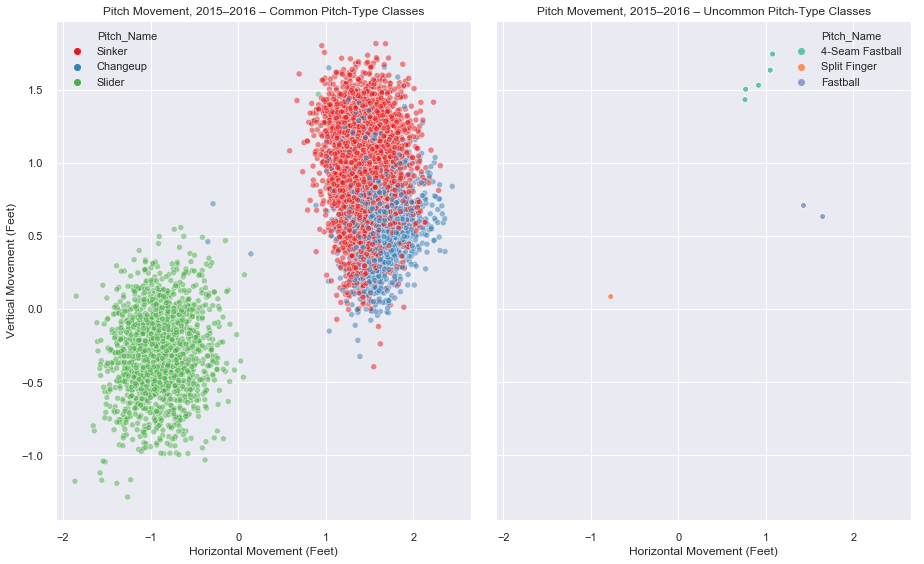

In [510]:
fig, axes = plt.subplots(1, 2, figsize=(13, 8), sharex=True, sharey=True)
sns.set(style="darkgrid", context='notebook')

sns.scatterplot(x='Horizontal_Movement', y='Vertical_Movement',
                data=sale_pitchfx[sale_pitchfx['Pitch_Name'].isin(['Sinker',
                                                                   'Slider',
                                                                   'Changeup'])],
                hue='Pitch_Name', palette='Set1', alpha=0.5, ax=axes[0])
axes[0].set_title('Pitch Movement, 2015–2016 – Common Pitch-Type Classes')
axes[0].set_xlabel('Horizontal Movement (Feet)')
axes[0].set_ylabel('Vertical Movement (Feet)')
sns.scatterplot(x='Horizontal_Movement', y='Vertical_Movement',
                data=sale_pitchfx[sale_pitchfx['Pitch_Name'].isin(['Fastball',
                                                                   'Split Finger',
                                                                   '4-Seam Fastball'])],
                hue='Pitch_Name', palette='Set2', alpha=1, ax=axes[1])
axes[1].set_title('Pitch Movement, 2015–2016 – Uncommon Pitch-Type Classes')
axes[1].set_xlabel('Horizontal Movement (Feet)')

plt.tight_layout()

It seems very plausible that those four-seam fastballs could be sinkers, that the split-finger fastball could be a changeup, and that the two "fastballs" could be either changeups or sinkers.

Maybe checking out the velocity and spin-rates of these pitches will tell me something.

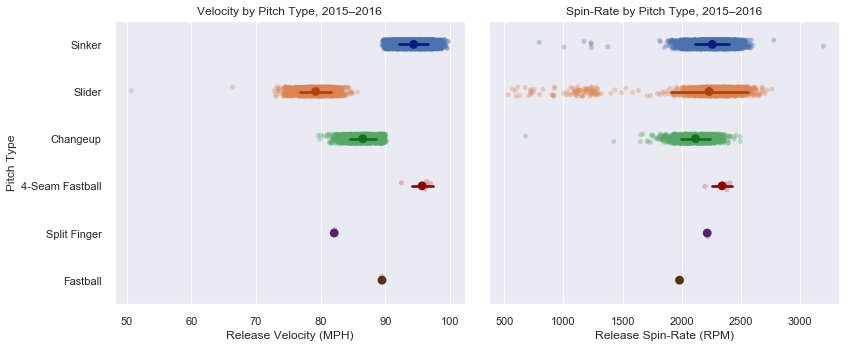

In [511]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=False, sharey=True)
sns.set(style="darkgrid", context='notebook')

# Show each observation with a scatterplot
sns.stripplot(x='Release_Speed', y='Pitch_Name', data=sale_pitchfx,
              order=['Sinker', 'Slider','Changeup','4-Seam Fastball',
                     'Split Finger', 'Fastball'],
              alpha=.33, zorder=1, ax=axes[0])
# Show the conditional means
sns.pointplot(x="Release_Speed", y="Pitch_Name", data=sale_pitchfx,
              order=['Sinker', 'Slider','Changeup','4-Seam Fastball',
                     'Split Finger', 'Fastball'],
              palette="dark", ci='sd', ax=axes[0])
axes[0].set_title('Velocity by Pitch Type, 2015–2016')
axes[0].set_xlabel('Release Velocity (MPH)')
axes[0].set_ylabel('Pitch Type')

# Show each observation with a scatterplot
sns.stripplot(x='Release_Spin_Rate', y='Pitch_Name', data=sale_pitchfx,
              order=['Sinker', 'Slider','Changeup','4-Seam Fastball',
                     'Split Finger', 'Fastball'],
              alpha=.33, zorder=1, ax=axes[1])
# Show the conditional means
sns.pointplot(x="Release_Spin_Rate", y="Pitch_Name", data=sale_pitchfx,
              order=['Sinker', 'Slider','Changeup','4-Seam Fastball',
                     'Split Finger', 'Fastball'],
              palette="dark", ci='sd', ax=axes[1])
axes[1].set_title('Spin-Rate by Pitch Type, 2015–2016')
axes[1].set_xlabel('Release Spin-Rate (RPM)')
axes[1].set_ylabel('')

plt.tight_layout()

Once again, the four-seamers line up right along with the sinkers; the split-finger lines up well with the sliders, and the "fastball" seems like a toss-up between a slow sinker or a fast changeup.

It could be that Sale was lightly experimenting with some different pitches. More likely, it seems that this is actually some combination of mislabeled sinkers, sliders, and/or changeups, especially considering how seldom these three pitch-types show up in 2015 (and that they're non-existent in 2016). In any case, I'm comfortable in assuming that something fluky happened with the initial classification.

Making this assumption, I'll assign each `Pitch_Name` to `NaN` and re-label them later using a K-Nearest Neighbors classifier.

In [512]:
sale_pitchfx.replace(['Fastball', 'Split Finger', '4-Seam Fastball'],
                      np.nan, inplace=True)

In [513]:
# sanity check
sale_pitchfx.Pitch_Name.value_counts()

Sinker      3594
Changeup    1576
Slider      1498
Name: Pitch_Name, dtype: int64

In [514]:
# recheck null totals
sale_pitchfx.isnull().sum()

Game_Date                0
Release_Speed            0
Release_Point_X        124
Release_Point_Z        124
Horizontal_Movement      0
Vertical_Movement        0
Inning                   0
Velocity_X               0
Velocity_Y               0
Velocity_Z               0
Acceleration_X           0
Acceleration_Y           0
Acceleration_Z           0
Perceived_Speed        157
Release_Spin_Rate      206
Release_Extension      157
Release_Point_Y        124
Plate_Appearance         0
Pitch_Per_PA             0
Pitch_Name              78
Pitch_Per_Game           0
dtype: int64

Now I'll look to see if the 124 missing values in `Release_Point_X` are associated with the 124 missing values in `Release_Point_Y` and `Release_Point_Z`, as I suspect they are.

In [515]:
# remove limit on display rows
pd.set_option('display.max_rows', None)

# view subset of df only where `release_pos_x` is NaN
sale_pitchfx[sale_pitchfx['Release_Point_X'].isnull()]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
89,2015-04-12,94.9,NaN,NaN,1.716742,1.717900,6,-9.768,-137.728,-2.784,25.311,32.646,-11.904,NaN,NaN,NaN,NaN,47,1,Sinker,90
98,2015-04-18,95.9,NaN,NaN,1.044567,0.536833,1,-9.221,-139.260,-3.722,16.851,26.535,-27.419,NaN,NaN,NaN,NaN,6,1,Sinker,1
100,2015-04-18,97.4,NaN,NaN,0.998642,1.111600,1,-9.516,-141.405,-4.046,16.554,29.955,-19.127,NaN,NaN,NaN,NaN,7,1,Sinker,3
102,2015-04-18,97.8,NaN,NaN,1.318725,1.027033,1,-10.352,-142.075,-2.456,21.266,32.826,-20.313,NaN,NaN,NaN,NaN,7,3,Sinker,5
105,2015-04-18,94.2,NaN,NaN,1.300633,0.718867,1,-11.055,-136.628,-1.851,19.809,24.758,-25.118,NaN,NaN,NaN,NaN,8,1,Sinker,8
106,2015-04-18,98.4,NaN,NaN,1.200433,1.339500,1,-12.242,-142.822,-1.146,19.593,35.366,-15.815,NaN,NaN,NaN,NaN,8,2,Sinker,9
108,2015-04-18,84.2,NaN,NaN,-0.697800,-0.075200,1,-6.713,-122.374,-0.743,-6.176,24.637,-35.006,NaN,NaN,NaN,NaN,8,4,Slider,11
111,2015-04-18,98.3,NaN,NaN,1.132242,1.386800,1,-11.231,-142.660,-5.820,19.014,27.626,-14.756,NaN,NaN,NaN,NaN,8,7,Sinker,14
115,2015-04-18,88.7,NaN,NaN,1.719525,0.956800,1,-8.961,-128.780,-3.850,22.061,29.597,-23.342,NaN,NaN,NaN,NaN,9,2,Changeup,18
117,2015-04-18,98.3,NaN,NaN,1.066833,1.163200,1,-11.353,-142.727,-2.308,17.373,39.203,-18.534,NaN,NaN,NaN,NaN,9,4,Sinker,20


Clearly, wherever `Release_Point_X` shows a missing value there's also a missing value under `Release_Point_Y` and `Release_Point_Z` (and in several other columns as well). 

In the interest of holding onto as much data as I responsibly can, I'll leave these alone for now, but will return shortly to fill in the missing values.

Because `Release_Spin_Rate` contains the highest number of null values at this point (206), fetching those observations should show me much of what I need to know in order to determine my next steps.

In [516]:
sale_pitchfx[sale_pitchfx['Release_Spin_Rate'].isnull()]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
89,2015-04-12,94.9,NaN,NaN,1.716742,1.717900,6,-9.768,-137.728,-2.784,25.311,32.646,-11.904,NaN,NaN,NaN,NaN,47,1,Sinker,90
98,2015-04-18,95.9,NaN,NaN,1.044567,0.536833,1,-9.221,-139.260,-3.722,16.851,26.535,-27.419,NaN,NaN,NaN,NaN,6,1,Sinker,1
100,2015-04-18,97.4,NaN,NaN,0.998642,1.111600,1,-9.516,-141.405,-4.046,16.554,29.955,-19.127,NaN,NaN,NaN,NaN,7,1,Sinker,3
102,2015-04-18,97.8,NaN,NaN,1.318725,1.027033,1,-10.352,-142.075,-2.456,21.266,32.826,-20.313,NaN,NaN,NaN,NaN,7,3,Sinker,5
105,2015-04-18,94.2,NaN,NaN,1.300633,0.718867,1,-11.055,-136.628,-1.851,19.809,24.758,-25.118,NaN,NaN,NaN,NaN,8,1,Sinker,8
106,2015-04-18,98.4,NaN,NaN,1.200433,1.339500,1,-12.242,-142.822,-1.146,19.593,35.366,-15.815,NaN,NaN,NaN,NaN,8,2,Sinker,9
108,2015-04-18,84.2,NaN,NaN,-0.697800,-0.075200,1,-6.713,-122.374,-0.743,-6.176,24.637,-35.006,NaN,NaN,NaN,NaN,8,4,Slider,11
111,2015-04-18,98.3,NaN,NaN,1.132242,1.386800,1,-11.231,-142.660,-5.820,19.014,27.626,-14.756,NaN,NaN,NaN,NaN,8,7,Sinker,14
115,2015-04-18,88.7,NaN,NaN,1.719525,0.956800,1,-8.961,-128.780,-3.850,22.061,29.597,-23.342,NaN,NaN,NaN,NaN,9,2,Changeup,18
117,2015-04-18,98.3,NaN,NaN,1.066833,1.163200,1,-11.353,-142.727,-2.308,17.373,39.203,-18.534,NaN,NaN,NaN,NaN,9,4,Sinker,20


In [517]:
# replace limit on display rows
pd.set_option('display.max_rows', 60)

There's no clear reason why any of this data is missing. But, since I at least know the pitch-types (`Pitch_Name`) for all of these, filling it in will be fairly straightforward.

Rather than substituting anything here with a median value, I would do well to replace most of these null values using the `ffill` method, which propagates the last valid observation forward to the next valid observation. There's a certain intuition to this. For example, the best indicator of what will be the velocity of the next fastball is probably the velocity of the previous fastball, and so on.

Obviously, this only make sense if it's done with pitch-type in mind. (If consecutive pitches are of different types, the metrics of one will likely have little in common with the metrics of another.)

In [518]:
# divide data into three subsets according to pitch_name
changeups = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Changeup']
sliders = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Slider']
sinkers = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker']

# fourth subset for rows with missing pitch names
pitch_name_nan = sale_pitchfx[sale_pitchfx['Pitch_Name'].isnull()]

In [519]:
# fill null values with ffill method
changeups.fillna(method='ffill', inplace=True)
sliders.fillna(method='ffill', inplace=True)
sinkers.fillna(method='ffill', inplace=True)

In [520]:
# concatenate subsets back together
sale_pitchfx = pd.concat([changeups, sliders, sinkers, pitch_name_nan])

# sort index
sale_pitchfx.sort_index(inplace=True)

sale_pitchfx.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2015-04-12,97.1,2.8587,5.1353,1.396658,1.210500,1,-11.236,-140.878,-2.484,21.781,35.521,-18.095,96.446,2418.0,6.369,54.1293,1,1,Sinker,1
1,2015-04-12,89.8,3.0128,4.8313,1.161467,0.670133,1,-9.495,-130.458,-2.804,16.023,27.088,-26.441,89.630,2093.0,6.342,54.1560,1,2,Sinker,2
2,2015-04-12,97.3,2.5821,4.7985,1.343775,1.049967,1,-12.778,-140.998,-5.994,20.977,36.720,-20.349,96.601,2122.0,6.430,54.0683,2,1,Sinker,3
3,2015-04-12,97.3,2.8287,4.9466,1.729267,1.545900,1,-8.990,-141.387,-4.675,27.160,30.982,-13.014,97.223,2465.0,6.256,54.2424,2,2,Sinker,4
4,2015-04-12,97.8,2.8071,5.0374,1.434233,1.309400,1,-9.714,-142.058,-1.695,22.877,33.682,-16.346,97.430,2384.0,6.296,54.2029,2,3,Sinker,5


In [521]:
# recheck null value totals
sale_pitchfx.isnull().sum()

Game_Date               0
Release_Speed           0
Release_Point_X         0
Release_Point_Z         0
Horizontal_Movement     0
Vertical_Movement       0
Inning                  0
Velocity_X              0
Velocity_Y              0
Velocity_Z              0
Acceleration_X          0
Acceleration_Y          0
Acceleration_Z          0
Perceived_Speed         0
Release_Spin_Rate       2
Release_Extension       0
Release_Point_Y         0
Plate_Appearance        0
Pitch_Per_PA            0
Pitch_Name             78
Pitch_Per_Game          0
dtype: int64

There are two rows where `Release_Spin_Rate` is still missing. Let me see what's going on with those.

In [522]:
sale_pitchfx[sale_pitchfx['Release_Spin_Rate'].isnull()]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
1580,2015-06-30,97.0,2.9454,5.5209,0.769017,1.504333,5,-9.413,-140.918,-3.678,12.935,33.488,-13.890,97.506,NaN,6.561,53.9397,41,6,NaN,70
4568,2016-06-04,75.3,3.0571,5.1580,-1.079117,-0.612700,5,-4.105,-109.587,0.425,-8.304,19.136,-39.006,74.115,NaN,5.547,54.9543,39,3,NaN,76


Looks like these ones managed to escape the forward-fills because they're also missing a `Pitch_Name`. But maybe that could be corrected.

I notice that the `Release_Speed` for these pitches are 97.5 and 75.3 MPH, respectively, which certainly seem to be on opposite ends of the extreme when speaking of Chris Sale's pitch repertoire. Just to make sure, I'll again inspect the distribution of `Release_Speed` for each of Chris Sale's pitch-types.

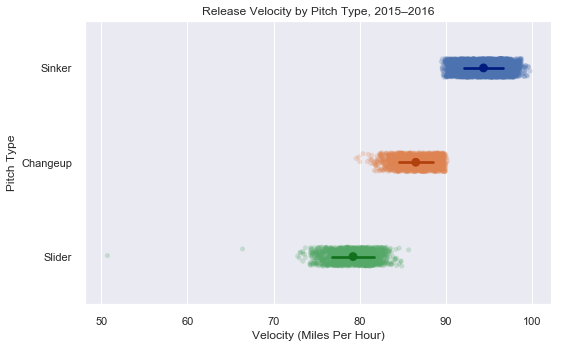

In [523]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid", context='notebook')

# Show each observation with a scatterplot
sns.stripplot(x="Release_Speed", y="Pitch_Name",
              data=sale_pitchfx, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="Release_Speed", y="Pitch_Name",
              data=sale_pitchfx, palette="dark", ci='sd')

plt.title('Release Velocity by Pitch Type, 2015–2016')
plt.xlabel('Velocity (Miles Per Hour)')
plt.ylabel('Pitch Type')
plt.tight_layout()

The 97.5 MPH pitch can hardly be anything other than a sinker. No other pitch-type ever comes close to such high velocity.

As for the other pitch, it seems likely, if anything, to be a slider. Sliders, by the way, are known for having a sweeping, horizontal movement as it reaches home plate. The telltale sign would be if this pitch has horizontal movement (`Horizontal_Movement`) that lines up well with Sale's other sliders. This pitch's `Horizontal_Movement` is -1.079117 feet. Do any of Sale's pitch-types have an average `Horizontal_Movement` close to that?

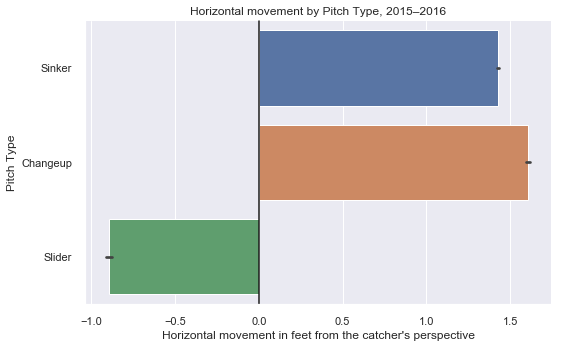

In [524]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid", context="notebook")

ax = sns.barplot(x='Horizontal_Movement', y='Pitch_Name', data=sale_pitchfx,
                 palette='deep')
ax.axvline(0, color="k", clip_on=False)
ax.set_title("Horizontal movement by Pitch Type, 2015–2016")
ax.set_xlabel("Horizontal movement in feet from the catcher's perspective")
ax.set_ylabel("Pitch Type")

sns.despine()
plt.tight_layout()

This pitch is almost certainly a slider. Let's give these pitches their rightful names, then forward-fill a `Release_Spin_Rate` for each.

In [525]:
# replace null value with the string 'Slider'
sale_pitchfx.at[4568, 'Pitch_Name'] = 'Slider'

# replace null values with string 'Sinker'
sale_pitchfx.at[1580, 'Pitch_Name'] = 'Sinker'

In [526]:
# sanity check
print(sale_pitchfx.loc[4568],'\n')
print(sale_pitchfx.loc[1580])

Game_Date              2016-06-04 00:00:00
Release_Speed                         75.3
Release_Point_X                     3.0571
Release_Point_Z                      5.158
Horizontal_Movement               -1.07912
Vertical_Movement                  -0.6127
Inning                                   5
Velocity_X                          -4.105
Velocity_Y                        -109.587
Velocity_Z                           0.425
Acceleration_X                      -8.304
Acceleration_Y                      19.136
Acceleration_Z                     -39.006
Perceived_Speed                     74.115
Release_Spin_Rate                      NaN
Release_Extension                    5.547
Release_Point_Y                    54.9543
Plate_Appearance                        39
Pitch_Per_PA                             3
Pitch_Name                          Slider
Pitch_Per_Game                          76
Name: 4568, dtype: object 

Game_Date              2015-06-30 00:00:00
Release_Speed             

In [527]:
# subset for sliders and sinkers
sliders = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Slider']
sinkers = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker']

# fill missing 'release_spin_rate' values
sliders.fillna(method='ffill', inplace=True)
sinkers.fillna(method='ffill', inplace=True)

# update df to reflect changes
sale_pitchfx.update(sliders)
sale_pitchfx.update(sinkers)

In [528]:
# recheck null totals
sale_pitchfx.isnull().sum()

Game_Date               0
Release_Speed           0
Release_Point_X         0
Release_Point_Z         0
Horizontal_Movement     0
Vertical_Movement       0
Inning                  0
Velocity_X              0
Velocity_Y              0
Velocity_Z              0
Acceleration_X          0
Acceleration_Y          0
Acceleration_Z          0
Perceived_Speed         0
Release_Spin_Rate       0
Release_Extension       0
Release_Point_Y         0
Plate_Appearance        0
Pitch_Per_PA            0
Pitch_Name             76
Pitch_Per_Game          0
dtype: int64

After all of that, I'm left with just 76 missing pitch names. Let me see when those show up.

In [529]:
# see dates when 'pitch_name' is NaN
sale_pitchfx[sale_pitchfx['Pitch_Name'].isnull()].Game_Date.value_counts()

2016-06-04    66
2015-09-07     3
2015-06-30     2
2015-04-18     2
2015-04-23     2
2015-04-12     1
Name: Game_Date, dtype: int64

All but three of these 69 null values occurred on June 4, 2016. Something must've gone wrong with Statcast that day! I'm interested in viewing a subset of the data that includes only that day's pitches.

In [530]:
# remove limit on display rows
pd.set_option('display.max_rows', None)

sale_pitchfx[sale_pitchfx['Game_Date']=='2016-06-04']

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4493,2016-06-04,91.9,3.2083,5.3216,1.342383,0.747533,1.0,-8.397,-133.639,-2.697,19.320,26.052,-25.127,91.637,2099.0,6.092,54.4093,6.0,1.0,Sinker,1.0
4494,2016-06-04,92.7,3.0768,5.5183,1.346558,0.630000,1.0,-11.118,-134.650,-2.583,19.904,23.341,-26.474,92.721,2064.0,6.085,54.4171,6.0,2.0,Sinker,2.0
4495,2016-06-04,92.2,3.0782,5.6385,1.389700,1.133100,1.0,-6.742,-134.107,-2.682,20.217,24.418,-20.045,91.728,2127.0,5.772,54.7294,6.0,3.0,Sinker,3.0
4496,2016-06-04,85.1,3.1552,5.1317,1.581750,0.521067,1.0,-9.790,-123.518,-1.707,19.046,23.995,-28.624,83.761,2182.0,5.674,54.8279,6.0,4.0,Changeup,4.0
4497,2016-06-04,86.8,3.1387,5.0465,1.705608,0.453700,1.0,-12.169,-125.766,-4.599,21.269,23.916,-29.249,86.036,2291.0,6.068,54.4334,6.0,5.0,Changeup,5.0
4498,2016-06-04,93.1,3.1997,5.3800,1.527475,0.975433,1.0,-10.318,-135.237,-1.522,22.158,28.136,-22.023,92.313,2052.0,5.990,54.5117,6.0,6.0,Sinker,6.0
4499,2016-06-04,90.5,3.1075,5.0780,1.474592,0.797700,1.0,-11.014,-131.352,-3.033,20.189,27.145,-24.795,89.312,2105.0,5.832,54.6701,7.0,1.0,Sinker,7.0
4500,2016-06-04,93.9,3.2239,5.1411,1.502425,0.916667,1.0,-9.752,-136.371,-2.791,22.253,28.028,-22.617,92.847,2125.0,5.823,54.6787,7.0,2.0,Sinker,8.0
4501,2016-06-04,94.2,3.1313,5.3759,1.354908,1.240600,1.0,-13.834,-136.406,-0.310,20.257,27.838,-18.323,93.160,2301.0,5.957,54.5447,7.0,3.0,Sinker,9.0
4502,2016-06-04,79.3,3.1291,5.3107,-1.376933,-0.250067,1.0,-4.481,-115.307,0.953,-12.004,22.499,-36.299,79.397,2399.0,6.705,53.7965,7.0,4.0,Slider,10.0


In [531]:
# replace limit on display rows
pd.set_option('display.max_rows', 60)

For whatever reason, Statcast failed to classify the majority of pitches Sale threw that day, beginning with his third pitch of the third inning. (The pitch that I manually labeled a bit earlier at index 4568 also happens to fall into this mix.)

In [532]:
pitch_name_nan = sale_pitchfx[sale_pitchfx['Game_Date']=='2016-06-04'].Pitch_Name.isnull().sum()
total_pitches = len(sale_pitchfx[sale_pitchfx['Game_Date']=='2016-06-04'])

print("{}% of that day's pitches are unlabeled.".format(round(100 *
                                                             (pitch_name_nan /
                                                              total_pitches),
                                                            2)))

59.46% of that day's pitches are unlabeled.


One approach would be to drop `2016-06-04` altogether—in addition to the other ten rows where `Pitch_Name` values are missing. But that seems awfully wasteful.

Instead, I'll attempt to preserve these 76 rows by building a K-Nearest Neighbors (KNN) model that can generate predicted values wherever `Pitch_Name` is missing, and then I'll plug those into the DataFrame. 

The first step here would be to gather together only those columns that would be useful in predicting `Pitch_Name`, and then separate data where `Pitch_Name` values are missing from data where `Pitch_Name` values are not missing.

In [533]:
sale_pitchfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6746 entries, 0 to 6753
Data columns (total 21 columns):
Game_Date              6746 non-null datetime64[ns]
Release_Speed          6746 non-null float64
Release_Point_X        6746 non-null float64
Release_Point_Z        6746 non-null float64
Horizontal_Movement    6746 non-null float64
Vertical_Movement      6746 non-null float64
Inning                 6746 non-null float64
Velocity_X             6746 non-null float64
Velocity_Y             6746 non-null float64
Velocity_Z             6746 non-null float64
Acceleration_X         6746 non-null float64
Acceleration_Y         6746 non-null float64
Acceleration_Z         6746 non-null float64
Perceived_Speed        6746 non-null float64
Release_Spin_Rate      6746 non-null float64
Release_Extension      6746 non-null float64
Release_Point_Y        6746 non-null float64
Plate_Appearance       6746 non-null float64
Pitch_Per_PA           6746 non-null float64
Pitch_Name             6670 non

In [534]:
pitch_metrics = sale_pitchfx[['Release_Speed', 'Release_Point_X',
                              'Release_Point_Z', 'Horizontal_Movement',
                              'Vertical_Movement', 'Velocity_X', 'Velocity_Y',
                              'Velocity_Z', 'Acceleration_X',
                              'Acceleration_Y', 'Acceleration_Z',
                              'Perceived_Speed', 'Release_Spin_Rate',
                              'Release_Extension', 'Release_Point_Y',
                              'Pitch_Name']]

In [535]:
# make subset of data where 'pitch_name' values are not missing
pitch_metrics_pitchname_notnull = pitch_metrics[pitch_metrics['Pitch_Name'].notnull()]

# make subset of data where 'pitch_name' values are missing
pitch_metrics_pitchname_isnull = pitch_metrics[pitch_metrics['Pitch_Name'].isnull()]

Now, working with `pitch_metrics_pitchname_notnull`, I'll separate my target (`Pitch_Name`) from the rest of the data, and then divide each of these into training and testing sets.

In [536]:
# create data (X)
pitch_metrics_pitchname_notnull_data = pitch_metrics_pitchname_notnull.drop(columns='Pitch_Name')

# create labels (y)
pitch_metrics_pitchname_notnull_labels = pitch_metrics_pitchname_notnull['Pitch_Name']

In [537]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pitch_metrics_pitchname_notnull_data,
                                                    pitch_metrics_pitchname_notnull_labels,
                                                    test_size=0.20,
                                                    random_state=55)

Since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.

The remedy for this is to normalize the data, which is done after splitting it into training and test sets so as to avoid "data leakage" (leaking information from the test set to the training set). Normalization (sometimes called Standardization or Scaling) means making sure that all of the data is represented at the same scale. The most common way to do this is to convert all numerical values to z-scores.

To scale my data, I'll use StandardScaler found in the sklearn.preprocessing module.

In [538]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train,
                               columns=X_train.columns)
scaled_df_train.head()

,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y
0,-1.628259,0.677285,0.992365,-1.749592,-1.933623,0.964663,1.626789,1.214299,-1.755428,-1.554418,-1.757746,-1.656647,0.059329,-1.622178,1.621557
1,0.769430,0.071972,0.077340,0.536834,-0.474707,0.184529,-0.781941,0.147872,0.637178,0.443770,-0.566719,0.904119,-5.714242,1.758101,-1.752616
2,-1.203352,-0.042290,0.558358,-1.629969,-1.799028,2.645887,1.183209,1.269954,-1.689063,-0.776719,-1.710054,-1.257603,-0.402934,-1.138458,1.146037
3,0.177595,-0.388611,-1.161498,0.763845,0.409777,-0.115397,-0.177223,-0.701768,0.731367,-0.234989,0.320324,0.231123,-0.704820,0.281029,-0.282828
4,0.784605,-0.404118,-0.164109,0.649660,0.993824,-1.764825,-0.738619,-1.582378,0.786103,-0.490959,1.080991,0.826847,-0.072746,-0.055848,-0.034116


Now that I've preprocessed the data, it's time to train a KNN classifier and validate its accuracy. With each iteration, the custom function below will:

- Search for the best value of K,
- fit a classifier to the training data, and...
- generate predictions for X_test (scaled_data_test).

Once predictions are generated using the most optimal K-value, the function will then calculate and print evaluation metrics and a confusion matrix.

Best Value for k: 9
Accuracy: 0.972
Precision: 0.975
Recall: 0.965
F1-Score: 0.974


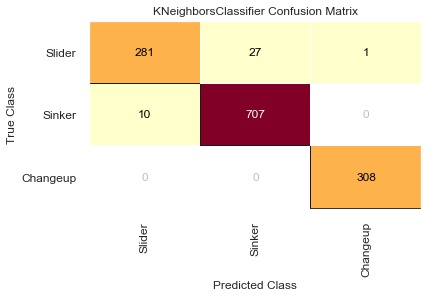

In [539]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Those results looks encouraging. Using a 'k' of 9, I'll go ahead and generate `Pitch_Name` predictions in the 76 rows where those values are missing.

In [540]:
# set data apart from missing labels
pitch_metrics_pitchname_isnull_data = pitch_metrics_pitchname_isnull.drop(columns='Pitch_Name')

# make array of the missing labels
pitch_metrics_pitchname_isnull_labels = pitch_metrics_pitchname_isnull['Pitch_Name']

In [541]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the data
scaled_data = scaler.fit_transform(pitch_metrics_pitchname_isnull_data)

# Convert into a DataFrame
scaled_df_data = pd.DataFrame(scaled_data,
                              columns=pitch_metrics_pitchname_isnull_data.columns,
                              index=pitch_metrics_pitchname_isnull_data.index)
scaled_df_data.head()

,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y
21,1.137642,-1.565772,-0.564626,0.101083,2.094304,-0.406659,-1.139977,-1.318358,0.219617,1.983134,2.255076,1.069538,1.248942,0.672236,-0.682399
157,0.497832,-2.304251,3.589898,0.070245,1.871260,0.094572,-0.504604,-1.938488,0.056077,1.328912,1.784384,0.500727,0.226550,1.381264,-1.422638
198,-1.300552,-2.667477,2.422593,-2.054301,-1.260049,2.081184,1.277919,0.924273,-2.198539,-0.599112,-1.275433,-1.395476,0.338900,-1.907560,1.863026
216,-0.020933,-0.961999,-0.814865,0.513333,0.000006,-1.077720,0.041612,-0.596139,0.382439,2.158482,-0.160552,-0.209754,-0.936282,0.192893,-0.200329
251,-0.020933,-2.800580,0.216420,0.768148,-0.153518,0.381092,0.002974,0.029689,0.675192,1.765149,-0.289802,-0.034432,-1.014927,1.211497,-1.220029


In [542]:
# Generate predictions to replace the null values under 'pitch_name'

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
# Fit the classifier
knn.fit(scaled_data_train, y_train)
# Predict on the data
data_preds = knn.predict(scaled_df_data)

data_preds

array(['Sinker', 'Sinker', 'Slider', 'Sinker', 'Sinker', 'Sinker',
       'Sinker', 'Sinker', 'Sinker', 'Sinker', 'Changeup', 'Sinker',
       'Sinker', 'Changeup', 'Sinker', 'Changeup', 'Changeup', 'Sinker',
       'Sinker', 'Slider', 'Sinker', 'Slider', 'Slider', 'Sinker',
       'Changeup', 'Changeup', 'Sinker', 'Sinker', 'Changeup', 'Sinker',
       'Sinker', 'Sinker', 'Sinker', 'Changeup', 'Sinker', 'Sinker',
       'Slider', 'Slider', 'Slider', 'Changeup', 'Sinker', 'Sinker',
       'Sinker', 'Sinker', 'Sinker', 'Sinker', 'Changeup', 'Sinker',
       'Sinker', 'Slider', 'Changeup', 'Sinker', 'Changeup', 'Slider',
       'Sinker', 'Sinker', 'Sinker', 'Changeup', 'Sinker', 'Slider',
       'Sinker', 'Changeup', 'Sinker', 'Sinker', 'Changeup', 'Sinker',
       'Changeup', 'Changeup', 'Changeup', 'Sinker', 'Sinker', 'Sinker',
       'Sinker', 'Sinker', 'Slider', 'Sinker'], dtype=object)

In [543]:
# Convert new predictions into DataFrame

predictions = pd.DataFrame(data_preds,
                           columns=['Pitch_Name'],
                           # Set index to match original `Sale` DF
                           # where 'pitch_name' values are missing
                           index=pitch_metrics_pitchname_isnull_labels.index)

predictions.head()

,Pitch_Name
21,Sinker
157,Sinker
198,Slider
216,Sinker
251,Sinker


At this point, I'm finally ready to replace the null values in the `Pitch_Name` column of the original `sale_pitchfx` DataFrame with the new predicted values that I've generated.

In [544]:
sale_pitchfx['Pitch_Name'].fillna(value=predictions['Pitch_Name'],
                                  inplace=True)

In [545]:
# check to see that there are no more null values
sale_pitchfx.isnull().sum()

Game_Date              0
Release_Speed          0
Release_Point_X        0
Release_Point_Z        0
Horizontal_Movement    0
Vertical_Movement      0
Inning                 0
Velocity_X             0
Velocity_Y             0
Velocity_Z             0
Acceleration_X         0
Acceleration_Y         0
Acceleration_Z         0
Perceived_Speed        0
Release_Spin_Rate      0
Release_Extension      0
Release_Point_Y        0
Plate_Appearance       0
Pitch_Per_PA           0
Pitch_Name             0
Pitch_Per_Game         0
dtype: int64

Very good! The `sale_pitchfx` DataFrame is now clear of null values.

As an extra assurance, I'd like to see that June 4, 2016 looks as it should, with all of its `Pitch_Name` values in place.

In [546]:
sale_pitchfx[sale_pitchfx['Game_Date']=='2016-06-04']

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4493,2016-06-04,91.9,3.2083,5.3216,1.342383,0.747533,1.0,-8.397,-133.639,-2.697,19.320,26.052,-25.127,91.637,2099.0,6.092,54.4093,6.0,1.0,Sinker,1.0
4494,2016-06-04,92.7,3.0768,5.5183,1.346558,0.630000,1.0,-11.118,-134.650,-2.583,19.904,23.341,-26.474,92.721,2064.0,6.085,54.4171,6.0,2.0,Sinker,2.0
4495,2016-06-04,92.2,3.0782,5.6385,1.389700,1.133100,1.0,-6.742,-134.107,-2.682,20.217,24.418,-20.045,91.728,2127.0,5.772,54.7294,6.0,3.0,Sinker,3.0
4496,2016-06-04,85.1,3.1552,5.1317,1.581750,0.521067,1.0,-9.790,-123.518,-1.707,19.046,23.995,-28.624,83.761,2182.0,5.674,54.8279,6.0,4.0,Changeup,4.0
4497,2016-06-04,86.8,3.1387,5.0465,1.705608,0.453700,1.0,-12.169,-125.766,-4.599,21.269,23.916,-29.249,86.036,2291.0,6.068,54.4334,6.0,5.0,Changeup,5.0
4498,2016-06-04,93.1,3.1997,5.3800,1.527475,0.975433,1.0,-10.318,-135.237,-1.522,22.158,28.136,-22.023,92.313,2052.0,5.990,54.5117,6.0,6.0,Sinker,6.0
4499,2016-06-04,90.5,3.1075,5.0780,1.474592,0.797700,1.0,-11.014,-131.352,-3.033,20.189,27.145,-24.795,89.312,2105.0,5.832,54.6701,7.0,1.0,Sinker,7.0
4500,2016-06-04,93.9,3.2239,5.1411,1.502425,0.916667,1.0,-9.752,-136.371,-2.791,22.253,28.028,-22.617,92.847,2125.0,5.823,54.6787,7.0,2.0,Sinker,8.0
4501,2016-06-04,94.2,3.1313,5.3759,1.354908,1.240600,1.0,-13.834,-136.406,-0.310,20.257,27.838,-18.323,93.160,2301.0,5.957,54.5447,7.0,3.0,Sinker,9.0
4502,2016-06-04,79.3,3.1291,5.3107,-1.376933,-0.250067,1.0,-4.481,-115.307,0.953,-12.004,22.499,-36.299,79.397,2399.0,6.705,53.7965,7.0,4.0,Slider,10.0


With the 2015–2016 portion of my data all filled out, let me now run through some of these same steps over the 2017–2019 portion.

In [547]:
sale_statcast.isnull().sum()

Game_Date              0
Release_Speed          5
Release_Point_X        5
Release_Point_Z        5
Horizontal_Movement    5
Vertical_Movement      5
Inning                 0
Velocity_X             5
Velocity_Y             5
Velocity_Z             5
Acceleration_X         5
Acceleration_Y         5
Acceleration_Z         5
Perceived_Speed        7
Release_Spin_Rate      8
Release_Extension      5
Release_Point_Y        5
Plate_Appearance       0
Pitch_Per_PA           0
Pitch_Name             4
Pitch_Per_Game         0
dtype: int64

Clearly, there aren't nearly as many holes to fill here as in 2015–2016. I can get a full view of these fairly easily.

In [548]:
sale_statcast[sale_statcast.isna().any(axis=1)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
61,2017-04-05,87.1,3.4218,5.1420,1.7536,0.5383,4,-7.7781,-126.3382,-1.8630,20.1530,29.8239,-26.3819,85.780,NaN,5.9820,54.5180,23,4,Changeup,62
195,2017-04-10,89.8,3.2099,5.5355,1.2786,1.2466,8,-11.5411,-130.6569,-3.0059,16.9449,30.5660,-17.8530,NaN,NaN,5.7831,54.7162,56,1,Changeup,92
237,2017-04-15,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,3,Slider,26
2595,2017-08-13,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,3,NaN,79
2760,2017-08-24,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,NaN,13
3000,2017-09-03,80.5,3.1466,5.2614,-1.4880,0.2056,4,-2.6069,-116.7010,-1.2939,-12.4667,24.7628,-30.3999,78.474,NaN,5.3540,55.1432,32,3,Slider,79
3951,2018-04-26,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,NaN,49
6183,2019-04-09,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,3,NaN,68
6965,2019-05-24,91.1,3.2047,5.2243,1.7157,0.2112,3,-9.9502,-132.2726,-3.6092,21.9815,27.8036,-29.1979,NaN,2154.0,5.9660,54.5340,22,1,Sinker,47


Of these nine rows, four of them are missing a `Pitch_Name`. I'll put those on hold, and will first conduct some forward-fills over the missing values in the other five rows.

First, though, I want to acknowledge that Sale, in this phase of his career, may have added a fourth pitch—the four-seam-fastball—into his arsenal. Or, more likely, Statcast radar improved in its ability to distinguish between Sale's sinker and four-seamer (both of which are types of fastballs), whereas previously they may have been lumped together under "Sinker". (While it may be lacking in this data, there's plenty of [evidence](http://www.brooksbaseball.net/outcome.php?player=519242&b_hand=-1&time=month&minmax=ci&var=pcount&s_type=2&gFilt=&pFilt=FA|SI|FC|CU|SL|CS|KN|CH|FS|SB&startDate=01/01/2015&endDate=01/01/2016) online indicating that Sale threw this four-seamer all along.)

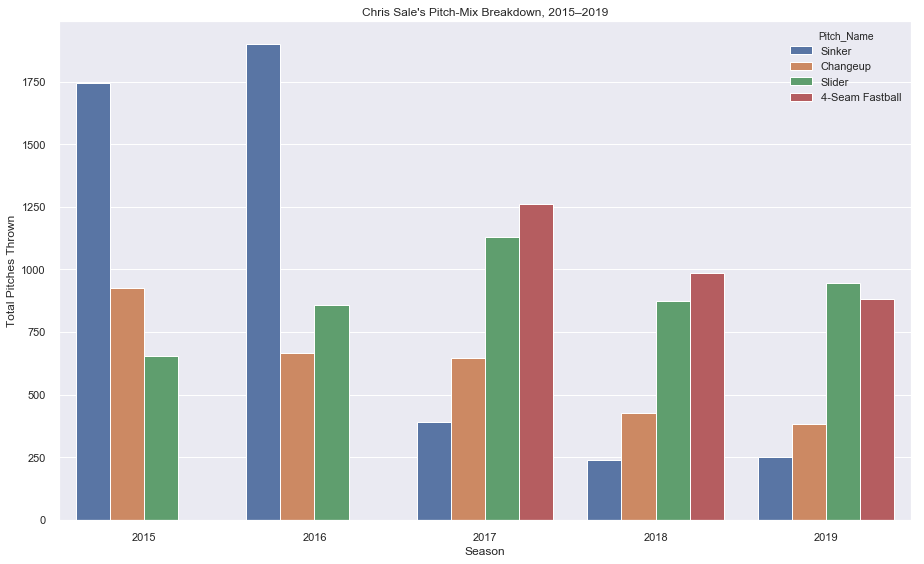

In [549]:
plt.figure(figsize=(13, 8))
sns.set(style="darkgrid", context="notebook")

ax = sns.countplot(x=pd.concat([sale_pitchfx, sale_statcast])['Game_Date'].dt.year,
                   hue='Pitch_Name', data=pd.concat([sale_pitchfx, sale_statcast]))
    
ax.set_title("Chris Sale's Pitch-Mix Breakdown, 2015–2019")
ax.set_xlabel("Season")
ax.set_ylabel("Total Pitches Thrown")

plt.tight_layout()

I'm disinclined to think that the sinker went from being Sale's most-frequently thrown pitch in 2015–2016 to the one he threw the least in 2017–2019. Instead, I think Statcast radar began distinguishing sinkers and four-seam fastballs in 2017.

In [550]:
# divide data into four subsets according to pitch_name
changeups = sale_statcast[sale_statcast['Pitch_Name']=='Changeup']
sliders = sale_statcast[sale_statcast['Pitch_Name']=='Slider']
sinkers = sale_statcast[sale_statcast['Pitch_Name']=='Sinker']
four_seam_ff = sale_statcast[sale_statcast['Pitch_Name']=='4-Seam Fastball']

# fifth subset for rows with missing pitch names
pitch_name_nan = sale_statcast[sale_statcast['Pitch_Name'].isnull()]

In [551]:
# fill null values with ffill method
changeups.fillna(method='ffill', inplace=True)
sliders.fillna(method='ffill', inplace=True)
sinkers.fillna(method='ffill', inplace=True)
four_seam_ff.fillna(method='ffill', inplace=True)

In [552]:
# concatenate subsets back together
sale_statcast = pd.concat([changeups, sliders, sinkers, four_seam_ff,
                          pitch_name_nan])

# sort index
sale_statcast.sort_index(inplace=True)

sale_statcast.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
0,2017-04-05,96.2,3.1636,5.3754,1.4998,0.6256,1,-11.1417,-139.5483,-4.4258,21.9997,31.0335,-23.2650,95.833,2132.0,6.225,54.2751,1,1,Sinker,1
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.194,54.3061,1,2,4-Seam Fastball,2
2,2017-04-05,98.2,3.2659,5.4465,1.4330,1.5505,1,-11.7156,-142.1910,-3.2597,22.3346,40.3759,-10.9549,96.661,2525.0,6.237,54.2633,1,3,4-Seam Fastball,3
3,2017-04-05,82.3,3.3122,5.3753,-1.0864,-0.1962,1,-7.7599,-119.4454,-2.1688,-8.2433,27.7926,-33.7763,80.695,2423.0,5.816,54.6839,1,4,Slider,4
4,2017-04-05,78.7,3.5380,5.2254,-1.0455,-0.2780,1,-6.8860,-114.2615,-0.7496,-7.3365,24.8860,-34.6524,77.133,2288.0,5.711,54.7885,1,5,Slider,5


In [553]:
# display all rows where null values are present
sale_statcast[sale_statcast.isna().any(axis=1)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
2595,2017-08-13,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,3,NaN,79
2760,2017-08-24,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,NaN,13
3951,2018-04-26,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,4,NaN,49
6183,2019-04-09,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,3,NaN,68


These rows, which are almost completely empty, will have to be tossed out.

In [554]:
sale_statcast.dropna(inplace=True)

In [555]:
# recheck null value totals
sale_statcast.isnull().sum()

Game_Date              0
Release_Speed          0
Release_Point_X        0
Release_Point_Z        0
Horizontal_Movement    0
Vertical_Movement      0
Inning                 0
Velocity_X             0
Velocity_Y             0
Velocity_Z             0
Acceleration_X         0
Acceleration_Y         0
Acceleration_Z         0
Perceived_Speed        0
Release_Spin_Rate      0
Release_Extension      0
Release_Point_Y        0
Plate_Appearance       0
Pitch_Per_PA           0
Pitch_Name             0
Pitch_Per_Game         0
dtype: int64

No more null values!

It might be a good idea now to check for and remove any suspiciously extreme outliers in my two DataFrames. In a certain sense, I'm uninterested in carrying this too far. After all, it stands to reason that outliers may be among my most valuable and telling data points when it comes to forecasting injury or targeting fatigue. Instead, I'm curious to see if I can detect anything that looks out of place to the point of being impossible (e.g., a 150-mph changeup), perhaps due to some glitch with the Statcast radar system.

First, I'll take a look by using box plots. I'll be on the lookout for any data points that lay far beyond the "whiskers."

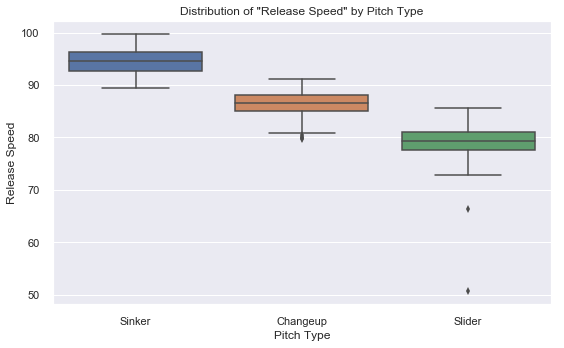

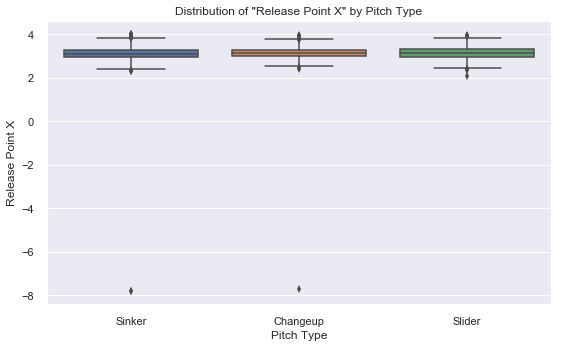

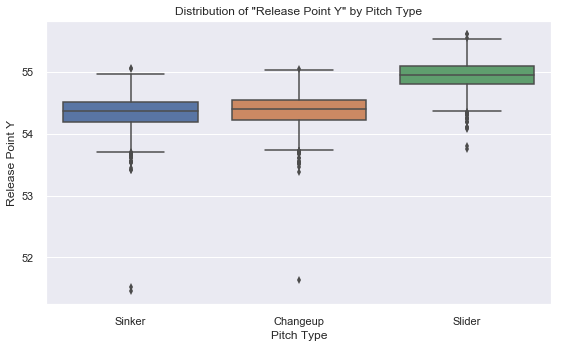

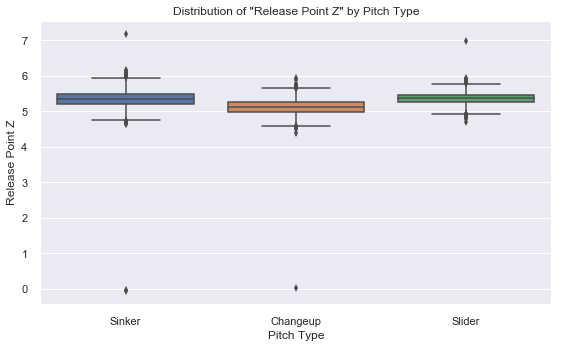

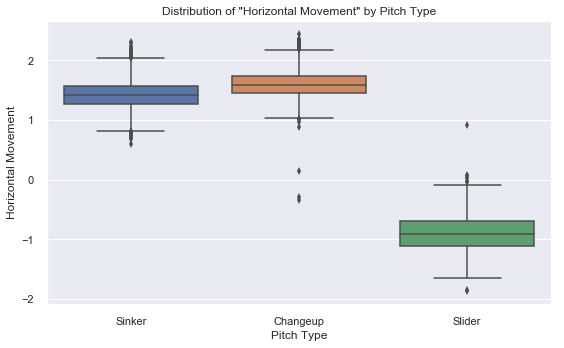

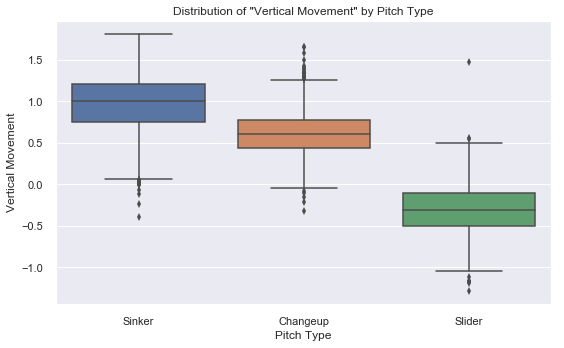

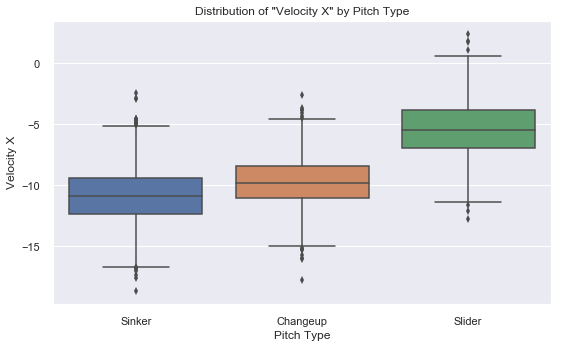

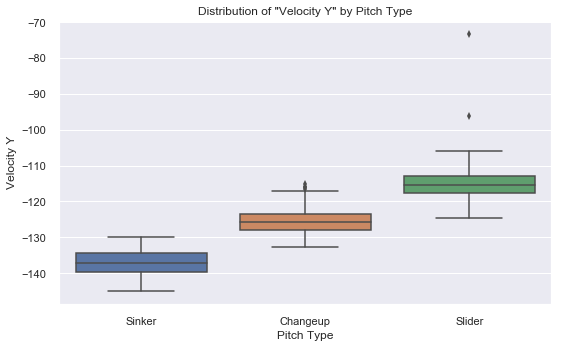

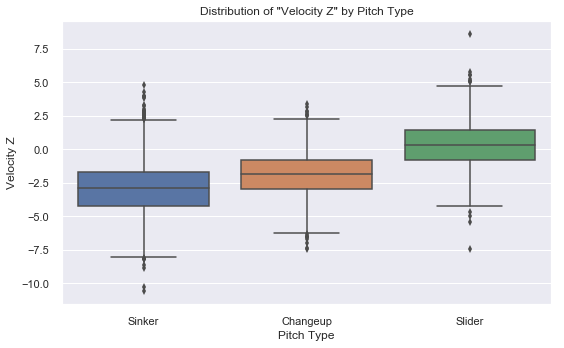

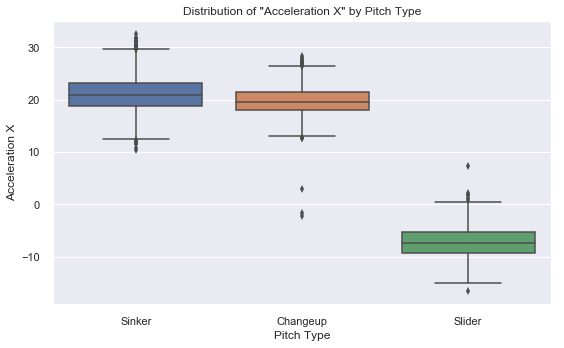

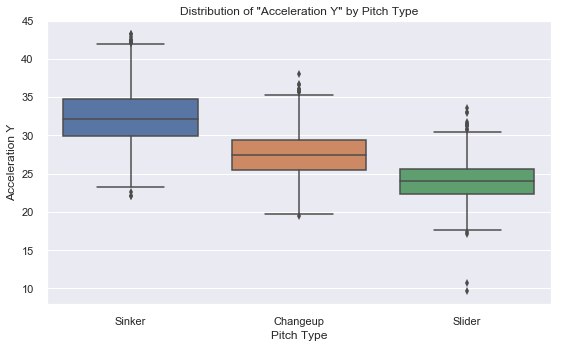

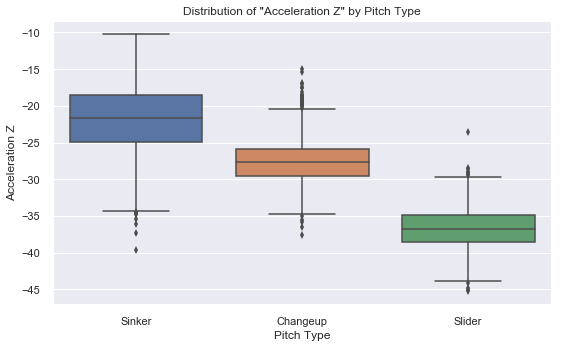

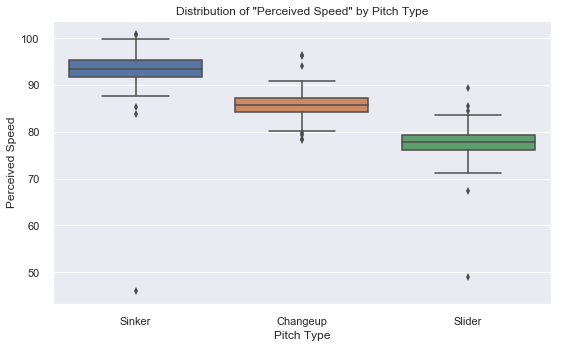

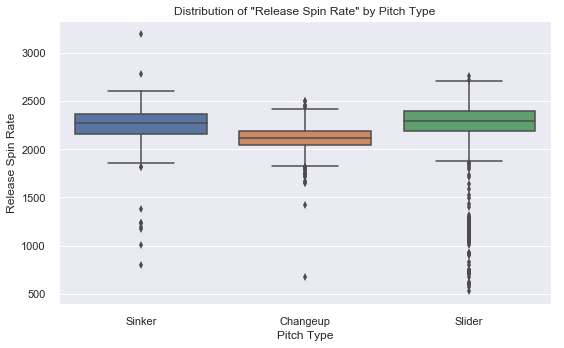

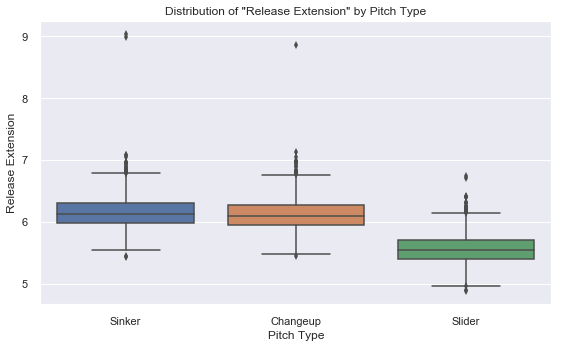

In [556]:
boxplot(sale_pitchfx)

While there are certainly plenty of outliers in the data, there are some that catch me as being quite far out:

- One very low-velocity slider.
- Some pitches (sinkers and changeups) with dramatically low release-points in all three dimensions (X, Y, Z). (They're probably the same pitches in each dimension.)
- At least one slider with unusually high vertical and horizontal movement, and velocity (in Y dimension).
- A sinker with exceedingly low perceived speed (despite there being no sinkers with such relatively low release speed), as well as a slider with very low perceived speed.
- Related to the outliers in `Perceived_Speed`, there are some high-end outliers in the `Release_Extension` column, including a couple of sinkers and at least one changeup.
- `Release_Spin_Rate` appears to have a lot of variance generally, but it's hard not to notice that low-spin changeup standing there all on its own.

Let me find these pitches and look into them more deeply, beginning with that low-velocity slider.

In [557]:
sale_pitchfx[sale_pitchfx['Release_Speed'] < 60]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
3253,2015-10-02,50.7,2.0643,6.9762,-0.326225,-0.1483,2.0,-4.233,-73.208,8.612,-0.755,9.665,-33.404,49.06,1492.0,5.226,55.2726,10.0,4.0,Slider,26.0


Now, I want to see the outliers all three release-point dimensions.

In [558]:
sale_pitchfx[sale_pitchfx['Release_Point_X'] < -6]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
486,2015-05-12,95.8,-7.7917,-0.0574,1.544175,0.837833,1.0,-7.738,-139.172,-3.116,23.478,32.778,-23.412,100.967,2273.0,9.041,51.4605,5.0,1.0,Sinker,7.0
523,2015-05-12,85.6,-7.6988,0.0241,1.720917,0.594167,4.0,-7.870,-124.346,-2.748,20.728,25.921,-27.805,89.972,2171.0,8.858,51.6440,26.0,5.0,Changeup,44.0
565,2015-05-12,95.7,-7.7854,-0.0280,1.549742,1.293633,6.0,-10.903,-138.929,-3.643,23.522,32.029,-17.242,100.776,2296.0,8.985,51.5172,45.0,3.0,Sinker,86.0


In [559]:
sale_pitchfx[sale_pitchfx['Release_Point_Y'] < 52]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
486,2015-05-12,95.8,-7.7917,-0.0574,1.544175,0.837833,1.0,-7.738,-139.172,-3.116,23.478,32.778,-23.412,100.967,2273.0,9.041,51.4605,5.0,1.0,Sinker,7.0
523,2015-05-12,85.6,-7.6988,0.0241,1.720917,0.594167,4.0,-7.870,-124.346,-2.748,20.728,25.921,-27.805,89.972,2171.0,8.858,51.6440,26.0,5.0,Changeup,44.0
565,2015-05-12,95.7,-7.7854,-0.0280,1.549742,1.293633,6.0,-10.903,-138.929,-3.643,23.522,32.029,-17.242,100.776,2296.0,8.985,51.5172,45.0,3.0,Sinker,86.0


In [560]:
sale_pitchfx[sale_pitchfx['Release_Point_Z'] < 1]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
486,2015-05-12,95.8,-7.7917,-0.0574,1.544175,0.837833,1.0,-7.738,-139.172,-3.116,23.478,32.778,-23.412,100.967,2273.0,9.041,51.4605,5.0,1.0,Sinker,7.0
523,2015-05-12,85.6,-7.6988,0.0241,1.720917,0.594167,4.0,-7.870,-124.346,-2.748,20.728,25.921,-27.805,89.972,2171.0,8.858,51.6440,26.0,5.0,Changeup,44.0
565,2015-05-12,95.7,-7.7854,-0.0280,1.549742,1.293633,6.0,-10.903,-138.929,-3.643,23.522,32.029,-17.242,100.776,2296.0,8.985,51.5172,45.0,3.0,Sinker,86.0


It turns out that these are the same three pitches, as suspected. Moving on to the other outliers that I noted...

In [561]:
sale_pitchfx[(sale_pitchfx['Pitch_Name']=='Slider') & (sale_pitchfx['Horizontal_Movement'] > .5)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
980,2015-06-03,66.4,2.5529,5.7317,0.916533,1.469933,3.0,-6.048,-96.205,-7.428,7.254,10.749,-23.545,67.349,1585.0,6.739,53.7582,29.0,4.0,Slider,49.0


In [562]:
sale_pitchfx[(sale_pitchfx['Pitch_Name']=='Slider') & (sale_pitchfx['Vertical_Movement'] > 1)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
980,2015-06-03,66.4,2.5529,5.7317,0.916533,1.469933,3.0,-6.048,-96.205,-7.428,7.254,10.749,-23.545,67.349,1585.0,6.739,53.7582,29.0,4.0,Slider,49.0


In [563]:
sale_pitchfx[(sale_pitchfx['Pitch_Name']=='Slider') & (sale_pitchfx['Velocity_Y'] > -90)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
3253,2015-10-02,50.7,2.0643,6.9762,-0.326225,-0.1483,2.0,-4.233,-73.208,8.612,-0.755,9.665,-33.404,49.06,1492.0,5.226,55.2726,10.0,4.0,Slider,26.0


In [564]:
sale_pitchfx[sale_pitchfx['Perceived_Speed'] < 50]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
2497,2015-08-21,97.0,2.3280,7.1933,1.530258,0.609933,1.0,-12.810,-140.640,-0.090,23.330,39.040,-26.510,46.007,1235.0,5.436,55.0630,6.0,2.0,Sinker,12.0
3253,2015-10-02,50.7,2.0643,6.9762,-0.326225,-0.148300,2.0,-4.233,-73.208,8.612,-0.755,9.665,-33.404,49.060,1492.0,5.226,55.2726,10.0,4.0,Slider,26.0


In [565]:
sale_pitchfx[sale_pitchfx['Release_Extension'] > 8]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
486,2015-05-12,95.8,-7.7917,-0.0574,1.544175,0.837833,1.0,-7.738,-139.172,-3.116,23.478,32.778,-23.412,100.967,2273.0,9.041,51.4605,5.0,1.0,Sinker,7.0
523,2015-05-12,85.6,-7.6988,0.0241,1.720917,0.594167,4.0,-7.870,-124.346,-2.748,20.728,25.921,-27.805,89.972,2171.0,8.858,51.6440,26.0,5.0,Changeup,44.0
565,2015-05-12,95.7,-7.7854,-0.0280,1.549742,1.293633,6.0,-10.903,-138.929,-3.643,23.522,32.029,-17.242,100.776,2296.0,8.985,51.5172,45.0,3.0,Sinker,86.0


In [566]:
sale_pitchfx[(sale_pitchfx['Pitch_Name']=='Changeup') & (sale_pitchfx['Release_Spin_Rate'] < 1000)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
95,2015-04-12,85.8,2.8777,4.9794,2.020125,1.009833,6.0,-11.872,-124.407,-3.07,24.325,23.952,-23.212,85.466,680.0,6.214,54.2847,48.0,3.0,Changeup,96.0


Many of these appear multiple times. All-in-all, these are the individual pitches that show up, listed according to index:

- 95 (`Release_Spin_Rate`)
- 486 (`Release_Point_X`, `Release_Point_Y`, `Release_Point_Z`, `Release_Extension`)
- 523 (`Release_Point_X`, `Release_Point_Y`, `Release_Point_Z`, `Release_Extension`)
- 565 (`Release_Point_X`, `Release_Point_Y`, `Release_Point_Z`, `Release_Extension`)
- 980 (`Horizontal_Movement`, `Vertical_Movement`)
- 2497 (`Perceived_Speed`)
- 3253 (`Release_Speed`, `Perceived_Speed`)

While certainly extreme, not all of these numbers strike me as being impossible. At least not to the point that they could only have been caused by some kind of Statcast error. Perhaps some of these were wild pitches (I'm thinking of pitch **980** in particular). However, I do think there are some exceptions. **486**, **523**, and **565**.

First, consider pitches **486**, **523**, and **565**. All three pitches were thrown on the same day—May 12, 2015, when Statcast was only in its second full month of use. It also must be taken into account what these particular metrics mean. `Release_Point_Z`, according to the documentation, is defined as the "Vertical Release Position of the ball measured in feet from the catcher's perspective." How likely is it that Chris Sale, who stands at 6-foot-6, has ever released a pitch at ground-level? Or that he, being left-handed, decided one day in May 2015 to turn around and throw with his right hand three times (See `Release_Position_X`)?

At this point, it doesn't seem that any of these three rows contain trustworthy information. I wouldn't even feel confident that the `Pitch_Name` values were classified accurately, since they may have been based on faulty data.

In [567]:
# remove rows
sale_pitchfx.drop([486, 523, 565], inplace=True)

Next, look at the peculiarity of pitch **2497**. A sinker with a `Release_Speed` of 97 MPH, *but a `Perceived_Speed` of 46 MPH*! That's simply impossible.

In [568]:
sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker'].describe()

,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Per_Game
count,3640.000000,3640.000000,3640.00000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,94.379615,3.130354,5.34501,1.425695,0.968342,3.926099,-10.857141,-136.959502,-2.922474,21.074999,32.336708,-21.933855,93.444260,2257.276923,6.151205,54.348270,28.640110,2.826374,52.760440
std,2.220238,0.265289,0.22108,0.231469,0.327135,2.211111,2.142572,3.185295,1.906115,3.204742,3.478781,4.426104,2.466869,146.540313,0.237432,0.237447,18.019764,1.721649,32.963207
min,89.500000,2.314500,4.64980,0.588100,-0.394833,1.000000,-18.672000,-144.918000,-10.581000,10.399000,22.000000,-39.624000,46.007000,795.000000,5.436000,53.414400,1.000000,1.000000,1.000000
25%,92.600000,2.941825,5.19770,1.267233,0.751833,2.000000,-12.348500,-139.522000,-4.251000,18.860000,29.918750,-24.899500,91.674000,2158.750000,5.981000,54.193050,12.000000,1.000000,24.000000
50%,94.500000,3.115500,5.34935,1.417533,0.999800,4.000000,-10.896000,-137.075000,-2.934000,20.860500,32.163500,-21.626500,93.507000,2271.000000,6.135000,54.364600,27.000000,2.000000,51.000000
75%,96.200000,3.299700,5.49900,1.573400,1.213367,6.000000,-9.442500,-134.433000,-1.678250,23.138250,34.723250,-18.540750,95.289250,2365.000000,6.304250,54.517725,44.000000,4.000000,81.000000
max,99.800000,4.034200,7.19330,2.309592,1.816800,9.000000,-2.408000,-129.828000,4.795000,32.587000,43.279000,-10.168000,99.864000,3197.000000,7.087000,55.063000,76.000000,13.000000,125.000000


Sinkers in this dataset have a median `Perceived_Speed` of 93.5 MPH.

`Perceived_Speed` is a function of `Release_Speed` and `Release Extension`. The extension of this pitch (2497) is 5.436 feet, which right at the bottom of the bunch, but not by much. Everything else related to this pitch looks to be within bounds (The spin rate is low, but not impossibly so). I think it would be sensible to replace this obviously wrong `Perceived_Speed` value with something else, and leave the rest of the pitch alone.

In [569]:
# use medians so the very outliers I'm trying to correct don't skew the average

# fetch avg metrics
avg_perceived_speed_sinker = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker']['Perceived_Speed'].median()
avg_release_speed_sinker = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker']['Release_Speed'].median()
avg_release_extension_sinker = sale_pitchfx[sale_pitchfx['Pitch_Name']=='Sinker']['Release_Extension'].median()

# fetch actual metrics for this pitch
release_speed_2497 = sale_pitchfx.loc[2497]['Release_Speed']
release_extension_2497 = sale_pitchfx.loc[2497]['Release_Extension']

# estimate perceived speed by subtracting sum of actual release speed and extension
# from sum of average perceived speed, average release speed and average extension
perceived_speed_pred_2497 = sum([avg_release_speed_sinker,
                                 avg_release_extension_sinker,
                                 avg_perceived_speed_sinker]) - sum(
                                    [release_speed_2497,
                                     release_extension_2497])
    
print('Estimated perceived speed:', round(perceived_speed_pred_2497, 3))

Estimated perceived speed: 91.706


In [570]:
# replace outlier with 91.706, which takes into account
# actual release speed and extension of the pitch

sale_pitchfx.at[2497, 'Perceived_Speed'] = round(perceived_speed_pred_2497, 3)

In [571]:
# sanity check
sale_pitchfx.loc[2497]

Game_Date              2015-08-21 00:00:00
Release_Speed                           97
Release_Point_X                      2.328
Release_Point_Z                     7.1933
Horizontal_Movement                1.53026
Vertical_Movement                 0.609933
Inning                                   1
Velocity_X                          -12.81
Velocity_Y                         -140.64
Velocity_Z                           -0.09
Acceleration_X                       23.33
Acceleration_Y                       39.04
Acceleration_Z                      -26.51
Perceived_Speed                     91.706
Release_Spin_Rate                     1235
Release_Extension                    5.436
Release_Point_Y                     55.063
Plate_Appearance                         6
Pitch_Per_PA                             2
Pitch_Name                          Sinker
Pitch_Per_Game                          12
Name: 2497, dtype: object

There's a second pitch (3253)—this time a slider—with a remarkably low `Perceived_Speed` (49.06 MPH). But in this case, it's matched by a similarly low `Release_Speed` (50.7 MPH). I'm curious to know what transpired here. Did the ball slip out of his hand? It seems likely, considering that the `Velocity_Z` value here (8.612 feet-per-second) is roughly *29 times higher* than the average among sliders (0.301 feet-per-second).

A Google search of "Chris Sale wild pitch October 2 2015" yields [this amazing result](https://www.mlb.com/cut4/chris-sale-fools-tigers-hitter-with-eephus-pitch/c-152959266)! And sure enough, this pitch is from the [second inning](https://bustedcoverage.com/2015/10/02/chris-sale-eephus-pitch-james-mccann/).

![SegmentLocal](img/100215_cws_sale_eephus.gif "Chris Sale Eephus Pitch")

An [Eephus pitch](https://en.wikipedia.org/wiki/Eephus_pitch)! I don't see many of those. According to Wikipedia, an Eephus "is considered a trick pitch because, in comparison to normal baseball pitches, which run from 70 to 100 miles per hour (110 to 160 km/h), an Eephus pitch appears to move in slow motion at 55 mph (89 km/h) or less, sometimes into the low-40s mph (66–69 km/h)."

That perfectly describes it.

As much as I love the Eephus pitch, it doesn't provide any helpful information, and may even work against me. It shouldn't even count as a slider; I'm better off removing that row altogether.

In [572]:
# remove row
sale_pitchfx.drop([3253], inplace=True)

Lastly, let me look into that very low-spin changeup from April 12, 2015.

In [573]:
sale_pitchfx.loc[95]

Game_Date              2015-04-12 00:00:00
Release_Speed                         85.8
Release_Point_X                     2.8777
Release_Point_Z                     4.9794
Horizontal_Movement                2.02013
Vertical_Movement                  1.00983
Inning                                   6
Velocity_X                         -11.872
Velocity_Y                        -124.407
Velocity_Z                           -3.07
Acceleration_X                      24.325
Acceleration_Y                      23.952
Acceleration_Z                     -23.212
Perceived_Speed                     85.466
Release_Spin_Rate                      680
Release_Extension                    6.214
Release_Point_Y                    54.2847
Plate_Appearance                        48
Pitch_Per_PA                             3
Pitch_Name                        Changeup
Pitch_Per_Game                          96
Name: 95, dtype: object

In [574]:
sale_pitchfx[sale_pitchfx['Pitch_Name']=='Changeup'].describe()

,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Per_Game
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,86.529504,3.156125,5.129639,1.604372,0.608270,4.084746,-9.753004,-125.610217,-1.917876,19.722800,27.479045,-27.571173,85.673906,2115.151915,6.119720,54.378308,29.915882,2.652228,55.574388
std,2.001161,0.239634,0.218431,0.245627,0.268213,2.065139,1.932214,2.934649,1.625595,2.722511,2.904281,3.029175,2.094915,121.718880,0.248436,0.247886,16.838181,1.684867,30.157391
min,79.600000,2.411400,4.403500,-0.345708,-0.324600,1.000000,-17.789000,-132.716000,-7.488000,-2.251000,19.393000,-37.630000,78.226000,680.000000,5.452000,53.372800,1.000000,1.000000,1.000000
25%,85.100000,2.992900,4.989900,1.452325,0.435067,2.000000,-11.062000,-127.835000,-3.016000,17.997000,25.488000,-29.499000,84.230000,2044.000000,5.950000,54.220500,16.000000,1.000000,30.000000
50%,86.600000,3.138700,5.131100,1.591492,0.611367,4.000000,-9.790000,-125.736000,-1.873000,19.571000,27.440000,-27.629000,85.700000,2118.000000,6.099000,54.398700,29.000000,2.000000,56.000000
75%,88.100000,3.304600,5.258700,1.743183,0.770467,6.000000,-8.450000,-123.551000,-0.831000,21.366000,29.407000,-25.844000,87.200000,2193.000000,6.279000,54.545700,43.000000,4.000000,80.000000
max,91.200000,3.993300,5.933900,2.444583,1.656267,9.000000,-2.610000,-115.253000,3.343000,28.224000,38.030000,-14.976000,96.300000,2496.000000,7.129000,55.048700,77.000000,10.000000,122.000000


The pitch appears to blend in among changeups with the exception of that 680-RPM spin-rate (The average for changeups is about 2118 RPM). Luckily for me, there's video available for this one.

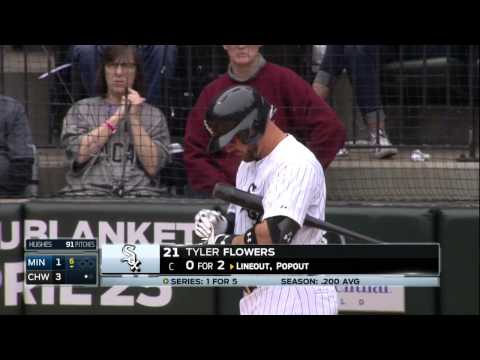

In [575]:
# Look for the 96th pitch of the game, at the 1:52:47 point in the video
YouTubeVideo('hmLzUjfU40s')

Nothing about that changeup catches my eye as being unusual. In this instance, I'll trust the Statcast reading and leave it alone. I don't have much of a basis for doing otherwise.

That about does it when it comes to treating these extreme outliers from 2015–2016. Now let me turn my attention to 2017–2019, beginning with checking out the distributions of each feature, using my `boxplot` function.

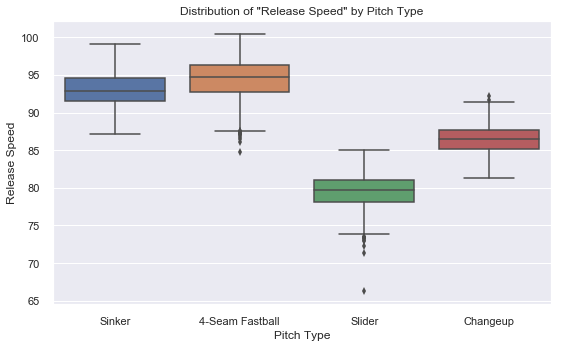

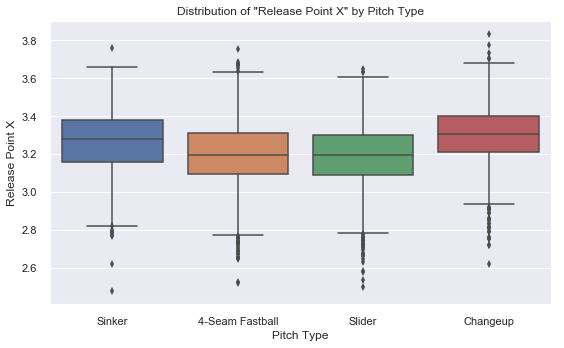

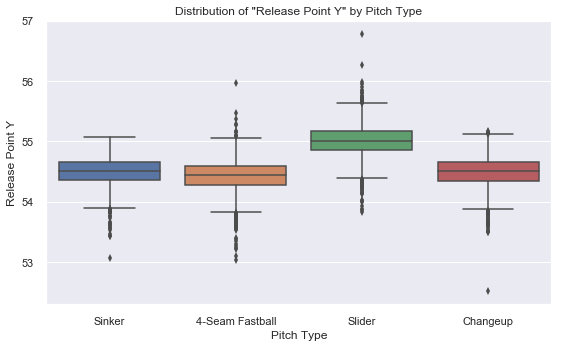

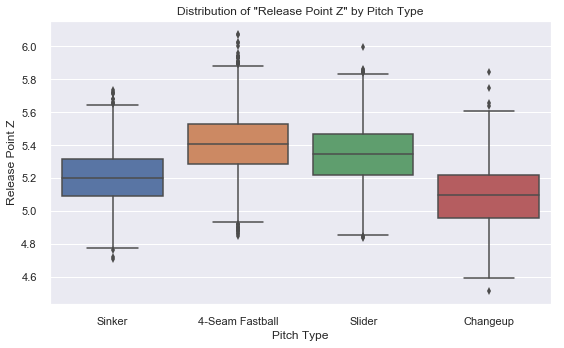

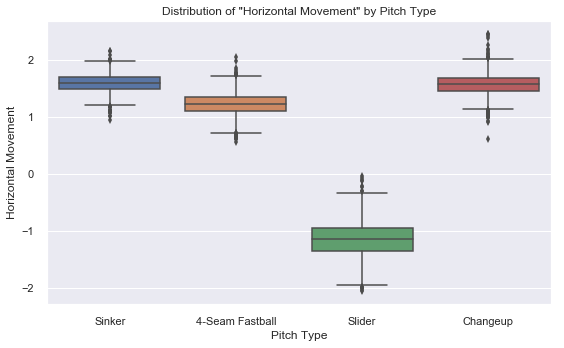

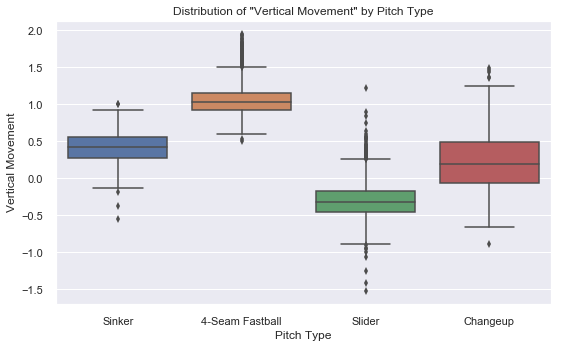

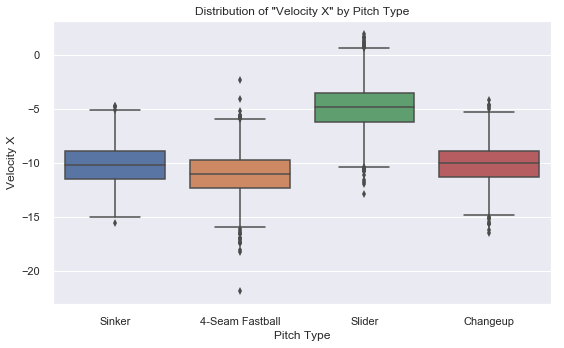

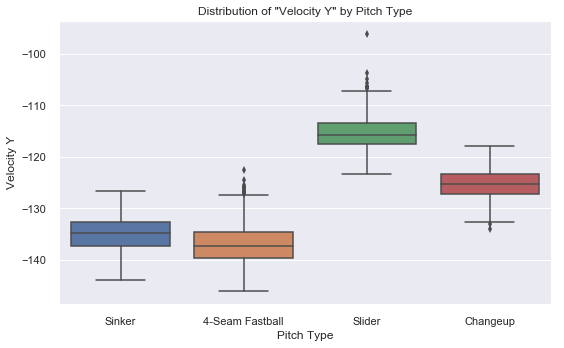

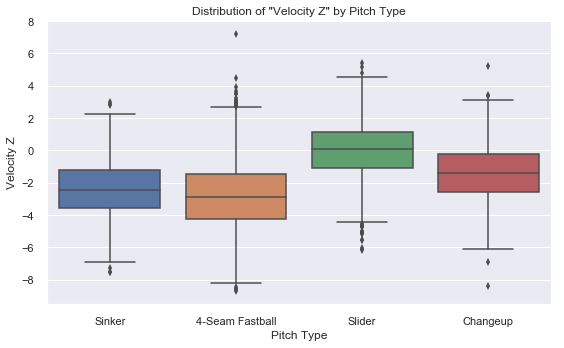

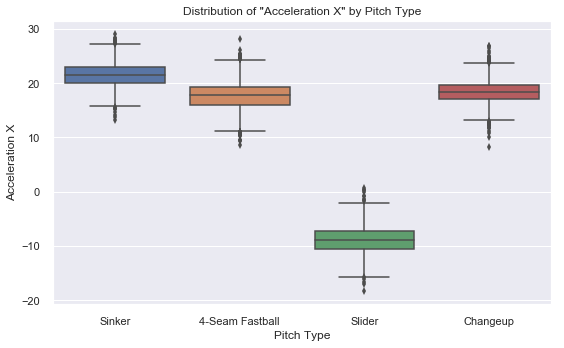

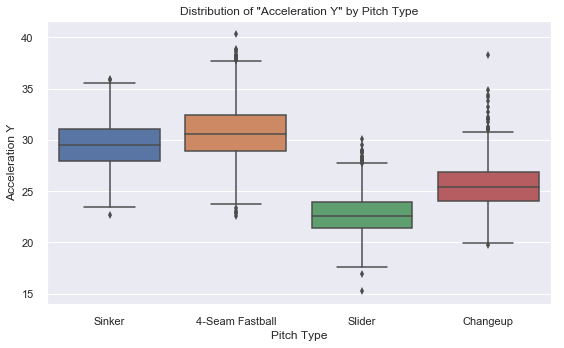

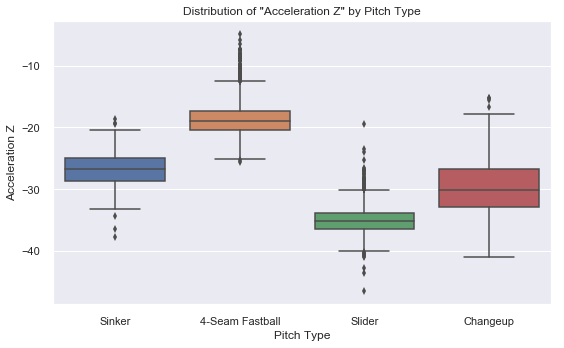

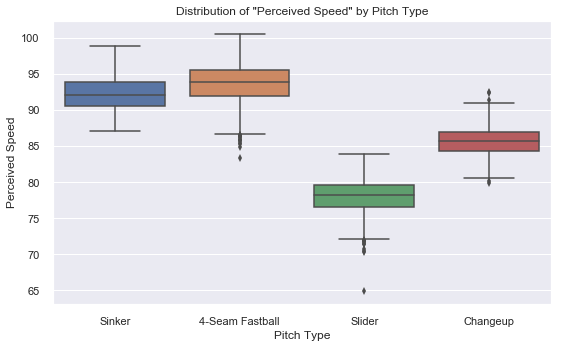

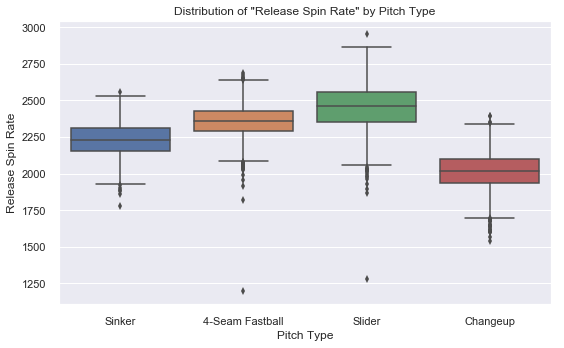

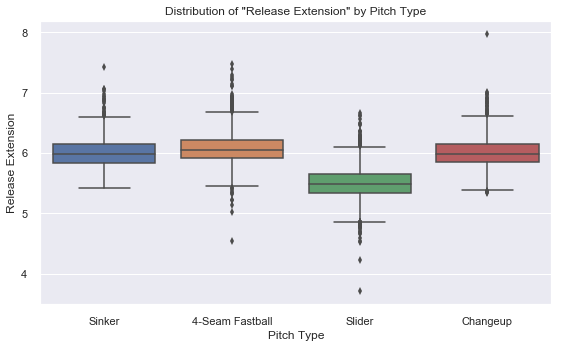

In [576]:
boxplot(sale_statcast)

Let me make a list of the pitches I want to take a closer look at:

- A slider with very low velocity (`Release_Speed`).
- A four-seam fastball with a very low `Velocity_X` value.
- A slider with a very high `Velocity_Y` value.
- A four-seam fastball with a very high `Velocity_Z` value.
- A changeup with a high `Acceleration_Y` value.
- A slider with a very low `Perceived_Speed` value. (It's probably the same pitch as the one with the low `Release_Speed`.)
- A couple of pitches (four-seam fastball, slider) with very low spin-rates.
- A slider with very low `Release_Extension`, and a changeup with very high `Release_Extension`.

Time now to pull up these observations.

In [577]:
sale_statcast[sale_statcast['Release_Speed'] < 70]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
6849,2019-05-19,66.3,2.5832,5.9945,-0.9667,-0.2953,2,-9.1772,-96.0558,-1.0008,-4.3257,15.2753,-34.051,64.93,2008.0,5.43,55.0699,14,3,Slider,37


In [578]:
sale_statcast[sale_statcast['Velocity_X'] < -20]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
542,2017-05-02,97.8,2.8509,5.4076,1.077,1.4399,1,-21.8674,-140.3556,-5.7333,19.3487,32.8703,-12.0278,96.545,2586.0,6.415,54.0852,3,1,4-Seam Fastball,9


In [579]:
sale_statcast[sale_statcast['Velocity_Y'] > -100]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
6849,2019-05-19,66.3,2.5832,5.9945,-0.9667,-0.2953,2,-9.1772,-96.0558,-1.0008,-4.3257,15.2753,-34.051,64.93,2008.0,5.43,55.0699,14,3,Slider,37


In [580]:
sale_statcast[sale_statcast['Velocity_Z'] > 6]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4460,2018-05-22,96.9,3.3919,5.1565,1.198,0.9801,3,-8.2951,-140.5802,7.229,17.8772,36.5194,-21.4323,96.191,2333.0,6.382,54.1164,27,1,4-Seam Fastball,37


In [581]:
sale_statcast[(sale_statcast['Pitch_Name']=='Changeup') & (sale_statcast['Acceleration_Y'] > 37)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
3733,2018-04-15,87.2,3.483,4.7752,1.563,-0.1141,3,-11.4342,-125.966,-3.4664,19.3685,38.3155,-32.6166,84.54,2044.0,6.142,54.3582,17,1,Changeup,34


In [582]:
sale_statcast[sale_statcast['Perceived_Speed'] < 67]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
6849,2019-05-19,66.3,2.5832,5.9945,-0.9667,-0.2953,2,-9.1772,-96.0558,-1.0008,-4.3257,15.2753,-34.051,64.93,2008.0,5.43,55.0699,14,3,Slider,37


In [583]:
sale_statcast[sale_statcast['Release_Spin_Rate'] < 1500]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.194,54.3061,1,2,4-Seam Fastball,2
2502,2017-08-08,84.3,3.2811,5.4660,-0.9326,-0.2554,7,-6.7306,-122.2117,-2.4190,-7.5289,28.6891,-34.3755,82.942,1276.0,6.024,54.4754,53,4,Slider,98


In [584]:
sale_statcast[(sale_statcast['Pitch_Name']=='Slider') & (sale_statcast['Release_Extension'] < 4)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
3717,2018-04-15,76.7,3.3675,5.1079,-0.9752,0.0085,1,-1.993,-110.8742,0.5472,-6.761,25.3661,-32.6836,72.004,1930.0,3.713,56.7879,5,1,Slider,18


In [585]:
sale_statcast[(sale_statcast['Pitch_Name']=='Changeup') & (sale_statcast['Release_Extension'] > 7.5)]

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
4272,2018-05-11,90.1,3.1516,4.8335,1.592,0.0868,5,-9.7577,-131.0873,-2.9458,21.5555,31.0799,-30.573,92.45,1989.0,7.978,52.5217,43,1,Changeup,67


These are the individual pitches that show up, listed according to index:

- 1 (`Release_Spin_Rate`)
- 542 (`Velocity_X`)
- 2502 (`Release_Spin_Rate`)
- 3717 (`Release_Extension`)
- 3733 (`Acceleration_Y`)
- 4272 (`Release_Extension`)
- 4460 (`Velocity_Z`)
- 6849 (`Release_Speed`, `Perceived_Speed`, `Velocity_Y`)

Unlike the 2015–2016 set, there's nothing here that can be immediately dismissed, or chalked up to error. I expect that I'll ultimately end up keeping these rows intact. But, out of curiosity, I'll pull up the video footage where possible.

Video of these pitches, which start in 2017, is easily accessible thanks to MLB's fairly new [video search tool](https://www.mlb.com/video/search?q=). I ran a series of searches, and here's what I found—beginning with pitch **6849**, which registered low `Release_Speed`, `Perceived`, and high `Velocity_Y`:

In [586]:
HTML('<iframe src="https://streamable.com/m/jake-marisnick-hit-by-pitch-mvai0r" width="560" height="315"></iframe>')

Yikes! A "wild, wild" pitch is right. Like many of Sale's sliders, that was unhittable—just not in the way he hoped. It is what it is, though, so I'll keep it around.

Now, here's that low-spin four-seam fastball (pitch **1**) from April 5, 2017:

In [587]:
HTML('<iframe src="https://streamable.com/m/chris-sale-foul-to-jordy-mercer-YiHvjy" width="560" height="315"></iframe>')

Nothing alarming there.

Now, the four-seam fastball (**542**) thrown on May 2, 2017 that registered a low `Velocity_X`.

In [588]:
HTML('<iframe src="https://streamable.com/m/chris-sale-ball-to-manny-machado-paOtaO" width="560" height="315"></iframe>')

Look out! I know this pitch registered a `Horizontal_Movement` of 1.077 feet (around average for four-seam fastballs), but I don't see how that's possible, since it was released from Sale's left hand and thrown all the way behind a right-handed batter. Notice too that the umpire warned both teams after the pitch, meaning that he believed Sale tried to hit the batter intentionally. A little [research](https://www.espn.com/mlb/story/_/id/19296884/benches-warned-boston-red-sox-chris-sale-throws-baltimore-orioles-manny-machado) into this shows that the Red Sox and Baltimore Orioles were feuding at the time, over and incident that occurred a month prior to this, when the batter in this video, Manny Machado, slide hard into second base, resulting in an injury to Boston's second-baseman, Dustin Pedroia. Seems like Sale was looking to retaliate.

Much like with the Eephus pitch seen earlier, I wouldn't want an abnormal pitch that Sale intentionally threw abnormally to end up distorting the results of this analysis. I'll remove it from the data.

In [589]:
# remove row
sale_statcast.drop([542], inplace=True)

Now, here's that slider from August 8, 2017 (**2502**), thrown with a low recorded spin-rate of 1276 RPM.

In [237]:
HTML('<iframe src="https://streamable.com/m/wilson-ramos-strikes-out-swinging-WNvnt4" width="560" height="315"></iframe>')

It didn't look terribly crisp, but there's nothing about it that would warrant its removal.

Moving on to pitch **3717**—a slider with very low `Release_Extension`:

In [591]:
HTML('<iframe src="https://streamable.com/m/chris-sale-ball-to-danny-valencia-svIvMY" width="560" height="315"></iframe>')

It does kind of look like the ball left his hand before he wanted it to. It's an outlier for sure, but this one will stay.

Next, I'll check out a pitch from the very same game as the previous pitch. This time, it's a changeup (**3733**) with a high `Acceleration_Y` value.

In [592]:
HTML('<iframe src="https://streamable.com/m/chris-sale-ball-to-caleb-joseph" width="560" height="315"></iframe>')

Looks a standard-fare pitch in the dirt.

The next one I'll look up is **4272**, a changeup with very high `Release_Extension`.

In [593]:
HTML('<iframe src="https://streamable.com/m/chris-sale-ball-to-josh-donaldson-45RmHs" width="560" height="315"></iframe>')

Alright, nothing crazy there. Just one more pitch to inspect, and it's pitch **4460**, a four-seam fastball with a very high `Velocity_Z` value. (I'm guessing he airmailed it. Let's see.)

In [594]:
HTML('<iframe src="https://streamable.com/m/chris-sale-ball-to-matt-duffy-OpTgxC" width="560" height="315"></iframe>')

Indeed he did! Nothing intentional about it, though, so it'll stay put.

And with that, I'm all finished hand-inspecting these outliers. Again, I don't want outliers to be taken out completely, because it's those very outliers that may prove most valuable when attempting to target fatigue or injury. But at least I was able to catch and remove an intentional (near) Hit-By-Pitch, a once-in-career type of Eephus pitch, and a few others that contained questionable data.

With my DataFrames looking squeaky clean, I'll take a moment to save them in their current state.

In [595]:
sale_pitchfx.to_csv('data/sale_pitchfx_clean.csv', index=False)
sale_statcast.to_csv('data/sale_statcast_clean.csv', index=False)

In [498]:
# uncomment and load below files if starting at this point

# sale_pitchfx = pd.read_csv('data/sale_pitchfx_clean.csv')
# sale_statcast = pd.read_csv('data/sale_statcast_clean.csv')

## 3. Explore
#### Understand the data. Find significant patterns and trends using statistical methods.

In [599]:
sale_statcast.tail()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game
8414,2019-08-13,95.7,3.1314,5.2087,1.1255,0.9681,7,-12.3400,-138.8856,-2.6033,17.4733,31.9428,-19.1956,95.798,2525.0,6.554,53.9453,63,3,4-Seam Fastball,104
8415,2019-08-13,96.6,3.0312,5.5203,0.9229,0.9892,7,-10.2223,-140.3095,-2.9091,14.5585,31.2505,-18.5637,96.925,2422.0,6.540,53.9592,63,4,4-Seam Fastball,105
8416,2019-08-13,83.1,3.0410,5.2492,-1.1546,-0.4757,7,-5.0542,-120.9725,0.6173,-10.2351,23.8790,-37.1534,82.835,2636.0,6.117,54.3824,63,5,Slider,106
8417,2019-08-13,81.3,3.2220,5.2825,-1.0911,-0.3883,7,-3.1605,-118.1095,2.4188,-9.2399,23.3693,-36.4355,79.805,2624.0,5.435,55.0647,64,1,Slider,107
8418,2019-08-13,89.8,3.1853,4.9191,1.4110,-0.0924,7,-10.9405,-130.2111,-2.3558,18.0909,26.2440,-32.9637,89.118,1983.0,5.973,54.5262,64,2,Changeup,108


The bottom of Chris Sale's main page on [Baseball Savant](https://baseballsavant.mlb.com/savant-player/chris-sale-519242?stats=career-r-pitching-mlb) shows a transaction history that includes every time he was placed on the Injured List (or the Disabled List, as it was called prior to the 2019 season). Since April 12, 2015—the earliest point in my data—Sale has been placed on the IL four times:

- July 31, 2018 (Retroactive to July 28, 2018), for mild left shoulder inflammation.
- August 18, 2018 (Retroactive to August 15, 2018), for mild left shoulder inflammation.
- August 17, 2019, for left elbow inflammation.
- June 28, 2020, for a left ulnar collateral ligament tear.

That last one is technically outside the scope of my data, which ends on August 13, 2019 (Presumably when he suffered the shoulder that landed him on the IL two days later.) The June 2020 IL placement is the result of an injury that the team [announced on March 5 of that year](https://www.mlb.com/news/chris-sale-tommy-john-surgery), during Spring Training. The bottom row of the `sale_statcast` DataFrame, from August 13, 2019, represents the most recent pitch Chris Sale has thrown in the major leagues as of this writing.

In [600]:
# create new column, fill with zeroes
sale_statcast['Sustained_Injury'] = 0

In [601]:
# sanity check
sale_statcast.head()

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game,Sustained_Injury
0,2017-04-05,96.2,3.1636,5.3754,1.4998,0.6256,1,-11.1417,-139.5483,-4.4258,21.9997,31.0335,-23.2650,95.833,2132.0,6.225,54.2751,1,1,Sinker,1,0
1,2017-04-05,96.8,3.3208,5.4331,1.1510,1.3698,1,-13.3514,-140.1805,-4.6208,18.2391,33.9109,-13.4323,95.891,1197.0,6.194,54.3061,1,2,4-Seam Fastball,2,0
2,2017-04-05,98.2,3.2659,5.4465,1.4330,1.5505,1,-11.7156,-142.1910,-3.2597,22.3346,40.3759,-10.9549,96.661,2525.0,6.237,54.2633,1,3,4-Seam Fastball,3,0
3,2017-04-05,82.3,3.3122,5.3753,-1.0864,-0.1962,1,-7.7599,-119.4454,-2.1688,-8.2433,27.7926,-33.7763,80.695,2423.0,5.816,54.6839,1,4,Slider,4,0
4,2017-04-05,78.7,3.5380,5.2254,-1.0455,-0.2780,1,-6.8860,-114.2615,-0.7496,-7.3365,24.8860,-34.6524,77.133,2288.0,5.711,54.7885,1,5,Slider,5,0


In [613]:
# look for last pitch thrown before July 31, 2018 IL placement
sale_statcast[sale_statcast['Game_Date']=='2018-07-27'].tail(1)

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game,Sustained_Injury
5651,2018-07-27,81.2,3.2809,4.8994,-0.7772,-0.2537,6,-6.4514,-118.1173,-1.0321,-6.0006,21.7327,-34.5587,80.767,2541.0,5.937,54.563,45,3,Slider,100,0


In [612]:
# look for last pitch thrown before August 18, 2018 IL placement
sale_statcast[sale_statcast['Game_Date']=='2018-08-12'].tail(1)

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game,Sustained_Injury
5719,2018-08-12,99.0,3.4426,5.4172,1.4712,1.0075,5,-10.7379,-143.7239,-2.6671,22.8441,33.9093,-17.8564,98.691,2394.0,6.287,54.2131,35,5,4-Seam Fastball,68,0


In [618]:
# look for last pitch thrown before August 17, 2019 IL placement
sale_statcast[sale_statcast['Game_Date']=='2019-08-13'].tail(1)

,Game_Date,Release_Speed,Release_Point_X,Release_Point_Z,Horizontal_Movement,Vertical_Movement,Inning,Velocity_X,Velocity_Y,Velocity_Z,Acceleration_X,Acceleration_Y,Acceleration_Z,Perceived_Speed,Release_Spin_Rate,Release_Extension,Release_Point_Y,Plate_Appearance,Pitch_Per_PA,Pitch_Name,Pitch_Per_Game,Sustained_Injury
8418,2019-08-13,89.8,3.1853,4.9191,1.411,-0.0924,7,-10.9405,-130.2111,-2.3558,18.0909,26.244,-32.9637,89.118,1983.0,5.973,54.5262,64,2,Changeup,108,0


In [619]:
# Replace zeroes with 1, indicating proximate point of injury
sale_statcast.loc[5651, 'Sustained_Injury'] = 1
sale_statcast.loc[5719, 'Sustained_Injury'] = 1
sale_statcast.loc[8418, 'Sustained_Injury'] = 1

In [620]:
# sanity check
sale_statcast['Sustained_Injury'].value_counts()

0    8411
1       3
Name: Sustained_Injury, dtype: int64

In [ ]:
# dates that he went on the DL (add the df with binary column)
# binary column for short rest or not

In [ ]:
# look at 7-day rolling avg

# do a logistic reg type model, coef are odds which can translate to probability

In [ ]:
# do a lot of statistical tests

In [ ]:
# STOP groupby pitch_number then check average velo per pitch#

In [ ]:
# pywaffle
# perctentage of pitch type

In [ ]:
# make different dfs for each pitch

In [ ]:
# use some of my markdown cells to do readme

In [ ]:
# overlay his rolling pitch metric trends with rolling ERA+ or something
# blog idea

In [ ]:
# t test to see if 2015–16 velocities are significantly different

In [ ]:
# web scrape for more injury/fatigue events beyond IL stints

https://fivethirtyeight.com/features/baseballs-new-pitch-tracking-system-is-just-a-bit-outside/